In [592]:
%matplotlib inline

In [593]:
# Import the important lib for sales prediction

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [594]:
#!pip install --upgrade pip setuptools wheel
#!pip install pep517
#!pip3 install --upgrade pip
#!pip install pyproject-toml
#!pip install TA_Lib-0.4.24-cp310-cp310-win_amd64.whl
#!pip install ta-lib
#import talib

In [595]:
import pandas as pd
import numpy as np
import datetime
import tqdm #progress bar
import talib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
data = pd.read_csv("data/New data/1222_SP.csv") 
data1 = pd.read_csv("data/New data/1222_CL.csv").dropna()
data2 = pd.read_csv("data/New data/1222_OVX.csv").dropna()
data3 = pd.read_csv("data/New data/1222_GC.csv").dropna()
data4 = pd.read_csv("data/New data/1222_GVZ.csv").dropna()
data5 = pd.read_csv("data/New data/1222_DXY.csv").dropna()
data6 = pd.read_csv("data/New data/1222_DX.csv").dropna()
data7= data1[data1['Open']!='-']
data8= data3[data3['Open']!='-']
Date = data.get("Date")
Date = pd.to_datetime(Date,format='%d-%m-%Y')
Open = data.get("Open")
High = data.get("High")
Low = data.get("Low")
Close = data.get("Close")
Close_cl = data7.get("Close")
Close_ovx = data2.get("Close")
Close_gc = data8.get("Close")
Close_gvz = data4.get("Close")
Close_dx = data6.get("Close")
Close_dxy = data5.get("Close")

dict = {"Date": Date,
        "open": Open,
        "high": High,
        "low": Low, 
        "close": Close,
        "close_cl": Close_cl, 
        "close_ovx": Close_ovx,
        "close_gc": Close_gc, 
        "close_gvz": Close_gvz,
        "close_dx": Close_dx, 
        "close_dxy": Close_dxy,
        "return":0,
       }
df = pd.DataFrame(dict)
df.set_index('Date', inplace=True)
df = df.dropna()
print("Total number of trading time points:%d" % (len(Date)))
print("The number of trading time points remaining after removing the blank value:%d" % (len(df)))
df.tail(10)

Total number of trading time points:2764
The number of trading time points remaining after removing the blank value:2271


open     high      low    close close_cl  close_ovx close_gc  \
Date                                                                          
2022-12-14  4015.54  4053.76  3965.65  3995.32    74.25  41.820000   1795.9   
2022-12-15  3958.37  3958.37  3879.45  3895.75    72.01  43.700001   1767.4   
2022-12-16  3890.91  3890.91  3827.91  3852.36    71.46  42.290001   1769.3   
2022-12-19  3853.79  3854.86  3800.04  3817.66    71.02  42.470001   1785.5   
2022-12-21  3839.49  3889.82  3839.49  3878.44    75.39  41.180000   1798.1   
2022-12-22  3853.26  3853.26  3764.49  3822.39    77.28  41.799999   1780.5   
2022-12-23  3815.11  3845.80  3797.01  3844.82    76.11  41.209999   1813.9   
2022-12-27  3843.34  3846.65  3813.22  3829.25    74.29  43.500000   1807.5   
2022-12-28  3829.56  3848.32  3780.78  3783.22    75.19  43.950001   1777.2   
2022-12-30  3829.06  3839.85  3800.34  3839.50    78.29  41.259998   1787.7   

            close_gvz    close_dx  close_dxy  return  
Date                                                  
2022-12-14  14.060000  105.056000  90.169998       0  
2022-12-15  14.390000  104.755997  90.650002       0  
2022-12-16  14.140000  104.799004  90.459999       0  
2022-12-19  14.490000  105.103996  90.580002       0  
2022-12-21  14.780000  103.738998  91.019997       0  
2022-12-22  14.880000  104.531998  91.199997       0  
2022-12-23  14.860000  104.661003  91.120003       0  
2022-12-27  16.299999  104.595001  91.529999       0  
2022-12-28  15.990000  103.606003  91.040001       0  
2022-12-30  16.250000  104.126999  90.930000       0

In [596]:
df1= df.sort_values(by='Date')
print(df1)

               open     high      low    close close_cl  close_ovx close_gc  \
Date                                                                          
2012-01-04  1277.03  1278.73  1268.10  1277.30   103.22  39.040001   1611.9   
2012-01-05  1277.30  1283.05  1265.26  1281.06   101.81  38.700001   1619.4   
2012-01-06  1280.93  1281.84  1273.34  1277.81   101.56  37.119999   1616.1   
2012-01-09  1277.83  1281.99  1274.55  1280.70   101.31  36.520000   1607.5   
2012-01-11  1292.02  1293.80  1285.41  1292.48   100.87  35.520000   1639.2   
...             ...      ...      ...      ...      ...        ...      ...   
2022-12-22  3853.26  3853.26  3764.49  3822.39    77.28  41.799999   1780.5   
2022-12-23  3815.11  3845.80  3797.01  3844.82    76.11  41.209999   1813.9   
2022-12-27  3843.34  3846.65  3813.22  3829.25    74.29  43.500000   1807.5   
2022-12-28  3829.56  3848.32  3780.78  3783.22    75.19  43.950001   1777.2   
2022-12-30  3829.06  3839.85  3800.34  3839.50    78

In [597]:
df1['close_gc'] = pd.to_numeric(df1['close_gc'],errors = 'coerce')
df1['close_cl'] = pd.to_numeric(df1['close_cl'],errors = 'coerce')

In [598]:
rates = ["open","high","close","close_cl","close_ovx","close_gc","close_gvz","close_dx","close_dxy"]
df2=df[rates]
df2['close_gc'] = pd.to_numeric(df2['close_gc'],errors = 'coerce')
df2['close_cl'] = pd.to_numeric(df2['close_cl'],errors = 'coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2271 entries, 2012-01-04 to 2022-12-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2271 non-null   float64
 1   high       2271 non-null   float64
 2   close      2271 non-null   float64
 3   close_cl   2271 non-null   float64
 4   close_ovx  2271 non-null   float64
 5   close_gc   2271 non-null   float64
 6   close_gvz  2271 non-null   float64
 7   close_dx   2271 non-null   float64
 8   close_dxy  2271 non-null   float64
dtypes: float64(9)
memory usage: 177.4 KB


C:\Users\Pankaj Suryavanssi\AppData\Local\Temp\ipykernel_12540\1411076482.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pankaj Suryavanssi\AppData\Local\Temp\ipykernel_12540\1411076482.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [599]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  2764.000000  2764.000000  2764.000000  2764.000000  2764.000000   
mean   2619.960952  2634.013527  2604.675962  2620.348636  2620.348636   
std     920.405039   926.902805   913.101211   920.157047   920.157047   
min    1258.860000  1278.730000  1258.860000  1277.060000  1277.060000   
25%    1950.097500  1962.257500  1939.100000  1951.052500  1951.052500   
50%    2432.890000  2442.480000  2422.160000  2433.145000  2433.145000   
75%    3136.772500  3149.227500  3117.772500  3130.412500  3130.412500   
max    4804.510000  4818.620000  4780.040000  4796.560000  4796.560000   

             Volume  
count  2.764000e+03  
mean   3.862122e+09  
std    9.388629e+08  
min    1.248960e+09  
25%    3.294575e+09  
50%    3.674435e+09  
75%    4.233218e+09  
max    9.976520e+09

In [600]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2764 non-null   object 
 1   Open       2764 non-null   float64
 2   High       2764 non-null   float64
 3   Low        2764 non-null   float64
 4   Close      2764 non-null   float64
 5   Adj Close  2764 non-null   float64
 6   Volume     2764 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.3+ KB


In [601]:
data7.describe()

Date  Open   High    Low  Close Adj Close    Volume
count         2764  2764   2764   2764   2764      2764      2764
unique        2764  2271   2255   2264   2294      2294      2757
top     03-01-2012  97.3  46.53  96.26  44.66     44.66  2,26,343
freq             1     5      5      4      6         6         2

In [602]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       2764 non-null   object
 1   Open       2764 non-null   object
 2   High       2764 non-null   object
 3   Low        2764 non-null   object
 4   Close      2764 non-null   object
 5   Adj Close  2764 non-null   object
 6   Volume     2764 non-null   object
dtypes: object(7)
memory usage: 237.3+ KB


In [603]:
data2.describe()

Open         High          Low        Close    Adj Close  Volume
count  2764.000000  2764.000000  2764.000000  2764.000000  2764.000000  2764.0
mean     37.705420    40.364667    35.972312    37.584313    37.584313     0.0
std      18.603396    25.840205    16.764251    19.430950    19.430950     0.0
min      14.670000    14.870000    13.930000    14.500000    14.500000     0.0
25%      27.290001    28.305000    26.430000    27.255000    27.255000     0.0
50%      34.279999    36.045000    32.939999    34.070000    34.070000     0.0
75%      43.849998    46.385001    41.867500    43.537499    43.537499     0.0
max     234.660004   517.190002   213.589996   325.149994   325.149994     0.0

In [604]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2764 non-null   object 
 1   Open       2764 non-null   float64
 2   High       2764 non-null   float64
 3   Low        2764 non-null   float64
 4   Close      2764 non-null   float64
 5   Adj Close  2764 non-null   float64
 6   Volume     2764 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.3+ KB


In [605]:
data8.describe()

Date    Open    High     Low   Close Adj Close Volume
count         2764    2764    2764    2764    2764      2764   2764
unique        2764    2202    2219    2238    2194      2194   1019
top     03-01-2012  1279.4  1320.7  1222.2  1273.7    1273.7      -
freq             1       5       5       5       6         6     34

In [606]:
data10 = pd.DataFrame()
data10 = data8.apply(lambda x: pd.to_numeric(x,errors='coerce'))

In [607]:
data10.describe()

Date         Open         High          Low        Close    Adj Close  \
count   0.0  2764.000000  2764.000000  2764.000000  2764.000000  2764.000000   
mean    NaN  1458.846491  1465.989399  1451.371093  1458.745043  1458.745043   
std     NaN   253.888429   255.544486   252.226970   253.993491   253.993491   
min     NaN  1053.700000  1062.000000  1046.200000  1050.800000  1050.800000   
25%     NaN  1251.600000  1256.100000  1244.800000  1251.075000  1251.075000   
50%     NaN  1333.600000  1340.250000  1326.700000  1333.650000  1333.650000   
75%     NaN  1711.400000  1721.425000  1703.725000  1712.850000  1712.850000   
max     NaN  2053.600000  2072.000000  2040.000000  2051.500000  2051.500000   

              Volume  
count    2730.000000  
mean     5511.512821  
std     29876.270594  
min         1.000000  
25%        44.000000  
50%       157.500000  
75%       512.000000  
max    386334.000000

In [608]:
data10.describe()

Date         Open         High          Low        Close    Adj Close  \
count   0.0  2764.000000  2764.000000  2764.000000  2764.000000  2764.000000   
mean    NaN  1458.846491  1465.989399  1451.371093  1458.745043  1458.745043   
std     NaN   253.888429   255.544486   252.226970   253.993491   253.993491   
min     NaN  1053.700000  1062.000000  1046.200000  1050.800000  1050.800000   
25%     NaN  1251.600000  1256.100000  1244.800000  1251.075000  1251.075000   
50%     NaN  1333.600000  1340.250000  1326.700000  1333.650000  1333.650000   
75%     NaN  1711.400000  1721.425000  1703.725000  1712.850000  1712.850000   
max     NaN  2053.600000  2072.000000  2040.000000  2051.500000  2051.500000   

              Volume  
count    2730.000000  
mean     5511.512821  
std     29876.270594  
min         1.000000  
25%        44.000000  
50%       157.500000  
75%       512.000000  
max    386334.000000

In [609]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 0 to 2772
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       2764 non-null   object
 1   Open       2764 non-null   object
 2   High       2764 non-null   object
 3   Low        2764 non-null   object
 4   Close      2764 non-null   object
 5   Adj Close  2764 non-null   object
 6   Volume     2764 non-null   object
dtypes: object(7)
memory usage: 237.3+ KB


In [610]:
data4.describe()

Open         High          Low        Close    Adj Close  Volume
count  2764.000000  2764.000000  2764.000000  2764.000000  2764.000000  2764.0
mean     16.699732    17.365915    16.067699    16.680948    16.680948     0.0
std       4.450856     4.818406     4.173849     4.416109     4.416109     0.0
min       8.890000     9.070000     7.290000     8.880000     8.880000     0.0
25%      13.480000    14.080000    12.927500    13.480000    13.480000     0.0
50%      16.205000    16.780001    15.705000    16.209999    16.209999     0.0
75%      19.292500    19.900000    18.492500    19.232500    19.232500     0.0
max      53.529999    54.369999    47.700001    48.980000    48.980000     0.0

In [611]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2764 non-null   object 
 1   Open       2764 non-null   float64
 2   High       2764 non-null   float64
 3   Low        2764 non-null   float64
 4   Close      2764 non-null   float64
 5   Adj Close  2764 non-null   float64
 6   Volume     2764 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.3+ KB


In [612]:
data5.describe()

Open         High          Low        Close    Adj Close  \
count  2764.000000  2764.000000  2764.000000  2764.000000  2764.000000   
mean     92.499193    92.815456    92.216889    92.521661    92.521661   
std       7.787444     7.821122     7.727390     7.778310     7.778310   
min      78.180000    78.669998    78.089996    78.269997    78.269997   
25%      85.247501    85.677500    85.022503    85.307499    85.307499   
50%      94.524998    94.769997    94.155003    94.510002    94.510002   
75%      97.412503    97.690002    97.160004    97.419998    97.419998   
max     114.190002   114.779999   113.330002   114.110001   114.110001   

             Volume  
count  2.764000e+03  
mean   8.426194e+03  
std    3.211722e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.429000e+07

In [613]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 1 to 3342
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2764 non-null   object 
 1   Open       2764 non-null   float64
 2   High       2764 non-null   float64
 3   Low        2764 non-null   float64
 4   Close      2764 non-null   float64
 5   Adj Close  2764 non-null   float64
 6   Volume     2764 non-null   float64
dtypes: float64(6), object(1)
memory usage: 237.3+ KB


In [614]:
data6.describe()

Open         High          Low        Close    Adj Close  \
count  2764.000000  2764.000000  2764.000000  2764.000000  2764.000000   
mean     92.493063    92.790186    92.197060    92.498347    92.498347   
std       7.720488     7.779300     7.656706     7.722149     7.722149   
min      78.220001    78.639999    78.120003    78.300003    78.300003   
25%      85.356249    85.776253    85.127500    85.406248    85.406248   
50%      94.442501    94.735000    94.097499    94.440502    94.440502   
75%      97.334999    97.586248    97.051252    97.327997    97.327997   
max     114.105003   114.745003   113.260002   114.046997   114.046997   

              Volume  
count    2764.000000  
mean    26070.886035  
std     14218.592341  
min         0.000000  
25%     16740.500000  
50%     22863.500000  
75%     31830.250000  
max    142820.000000

In [615]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 0 to 2769
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2764 non-null   object 
 1   Open       2764 non-null   float64
 2   High       2764 non-null   float64
 3   Low        2764 non-null   float64
 4   Close      2764 non-null   float64
 5   Adj Close  2764 non-null   float64
 6   Volume     2764 non-null   float64
dtypes: float64(6), object(1)
memory usage: 237.3+ KB


In [616]:
df1= df.sort_values(by='Date')
print(df1)

               open     high      low    close close_cl  close_ovx close_gc  \
Date                                                                          
2012-01-04  1277.03  1278.73  1268.10  1277.30   103.22  39.040001   1611.9   
2012-01-05  1277.30  1283.05  1265.26  1281.06   101.81  38.700001   1619.4   
2012-01-06  1280.93  1281.84  1273.34  1277.81   101.56  37.119999   1616.1   
2012-01-09  1277.83  1281.99  1274.55  1280.70   101.31  36.520000   1607.5   
2012-01-11  1292.02  1293.80  1285.41  1292.48   100.87  35.520000   1639.2   
...             ...      ...      ...      ...      ...        ...      ...   
2022-12-22  3853.26  3853.26  3764.49  3822.39    77.28  41.799999   1780.5   
2022-12-23  3815.11  3845.80  3797.01  3844.82    76.11  41.209999   1813.9   
2022-12-27  3843.34  3846.65  3813.22  3829.25    74.29  43.500000   1807.5   
2022-12-28  3829.56  3848.32  3780.78  3783.22    75.19  43.950001   1777.2   
2022-12-30  3829.06  3839.85  3800.34  3839.50    78

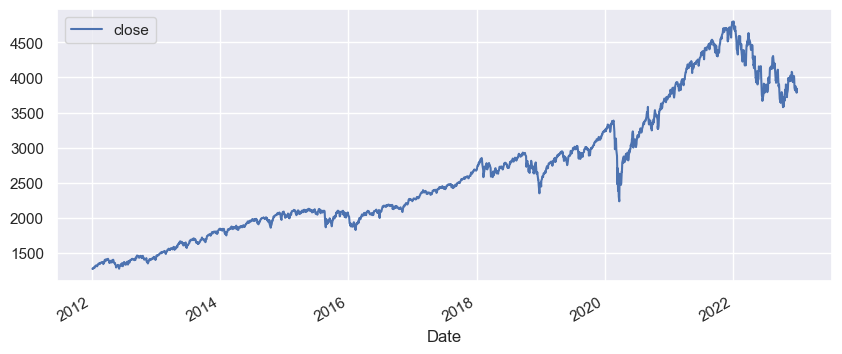

In [617]:
df1.plot(y='close',legend=True,figsize=(10,4)) #visualising the close rates
plt.ioff()
#plt.show()

In [618]:
#Moving average
df1['close_10']=df1['close'].rolling(10).mean() #calculating rolling mean
df1['close_50']=df1['close'].rolling(50).mean()

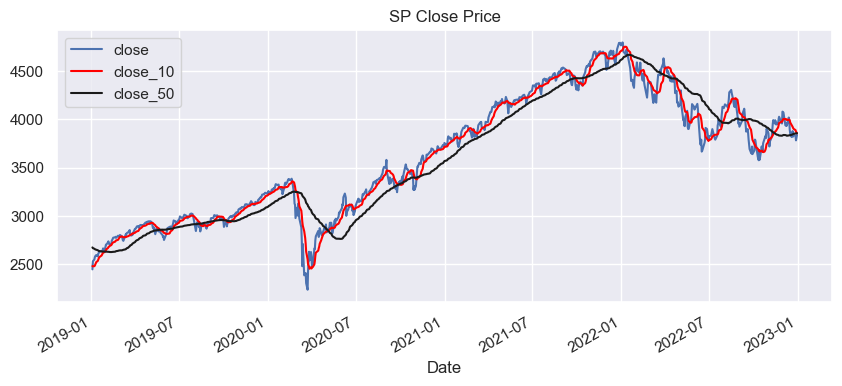

In [619]:
ax = df1.loc['2019-01-01':'2022-12-31'].plot(y='close',title='SP Close Price',figsize=(10,4))
df1.loc['2019-01-01':'2022-12-31'].plot(y='close_10',color='red',ax=ax)
df1.loc['2019-01-01':'2022-12-31'].plot(y='close_50',color='k',ax=ax)
#plt.ioff()
plt.show()

C:\Users\Pankaj Suryavanssi\AppData\Local\Temp\ipykernel_12540\2039504692.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



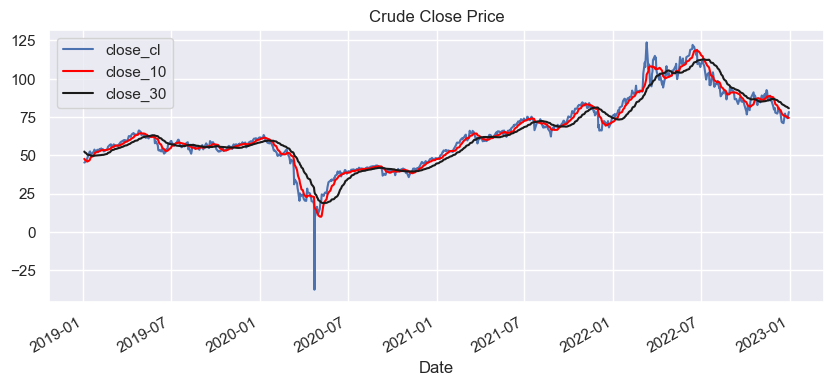

In [620]:
#Moving average
df2['close_10']=df2['close_cl'].rolling(10).mean() #calculating rolling mean
df2['close_30']=df2['close_cl'].rolling(30).mean()
ax = df2.loc['2019-01-01':'2022-12-31'].plot(y='close_cl',title='Crude Close Price',figsize=(10,4))
df2.loc['2019-01-01':'2022-12-31'].plot(y='close_10',color='red',ax=ax)
df2.loc['2019-01-01':'2022-12-31'].plot(y='close_30',color='k',ax=ax)
#plt.ioff()
plt.show()

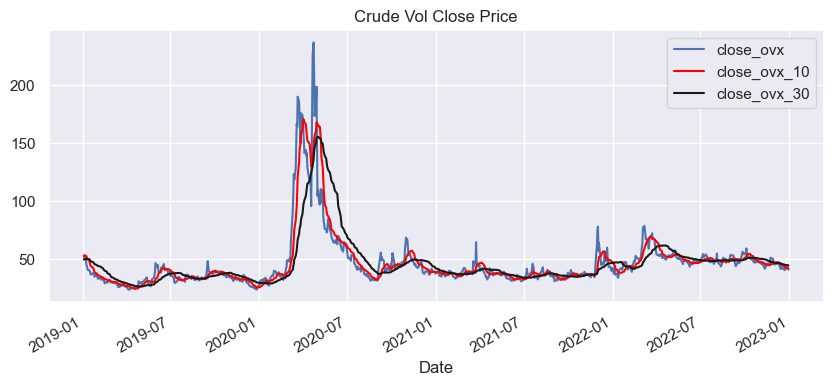

In [621]:
#Moving average
df2['close_ovx_10']=df2['close_ovx'].rolling(10).mean() #calculating rolling mean
df2['close_ovx_30']=df2['close_ovx'].rolling(30).mean()
ax = df2.loc['2019-01-01':'2022-12-31'].plot(y='close_ovx',title='Crude Vol Close Price',figsize=(10,4))
df2.loc['2019-01-01':'2022-12-31'].plot(y='close_ovx_10',color='red',ax=ax)
df2.loc['2019-01-01':'2022-12-31'].plot(y='close_ovx_30',color='k',ax=ax)
#plt.ioff()
plt.show()

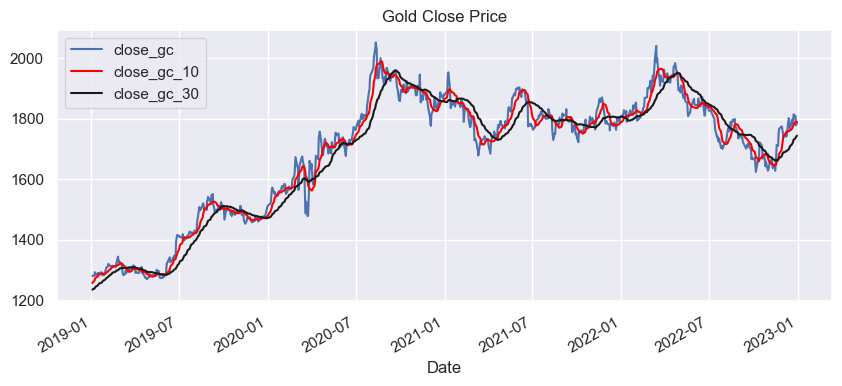

In [622]:
#Moving average
df2['close_gc_10']=df2['close_gc'].rolling(10).mean() #calculating rolling mean
df2['close_gc_30']=df2['close_gc'].rolling(30).mean()
ax = df2.loc['2019-01-01':'2022-12-31'].plot(y='close_gc',title='Gold Close Price',figsize=(10,4))
df2.loc['2019-01-01':'2022-12-31'].plot(y='close_gc_10',color='red',ax=ax)
df2.loc['2019-01-01':'2022-12-31'].plot(y='close_gc_30',color='k',ax=ax)
#plt.ioff()
plt.show()

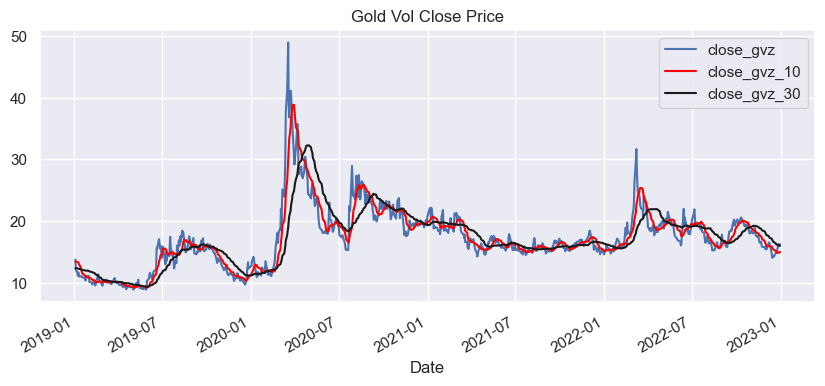

In [623]:
#Moving average
df2['close_gvz_10']=df2['close_gvz'].rolling(10).mean() #calculating rolling mean
df2['close_gvz_30']=df2['close_gvz'].rolling(30).mean()
ax = df2.loc['2019-01-01':'2022-12-31'].plot(y='close_gvz',title='Gold Vol Close Price',figsize=(10,4))
df2.loc['2019-01-01':'2022-12-31'].plot(y='close_gvz_10',color='red',ax=ax)
df2.loc['2019-01-01':'2022-12-31'].plot(y='close_gvz_30',color='k',ax=ax)
#plt.ioff()
plt.show()

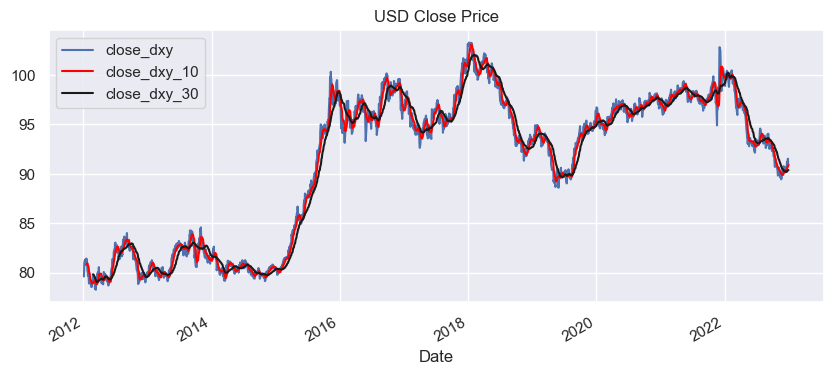

In [624]:
#Moving average
df2['close_dxy_10']=df2['close_dxy'].rolling(10).mean() #calculating rolling mean
df2['close_dxy_30']=df2['close_dxy'].rolling(30).mean()
ax = df2.plot(y='close_dxy',title='USD Close Price',figsize=(10,4))
df2.plot(y='close_dxy_10',color='red',ax=ax)
df2.plot(y='close_dxy_30',color='k',ax=ax)
#plt.ioff()
plt.show()

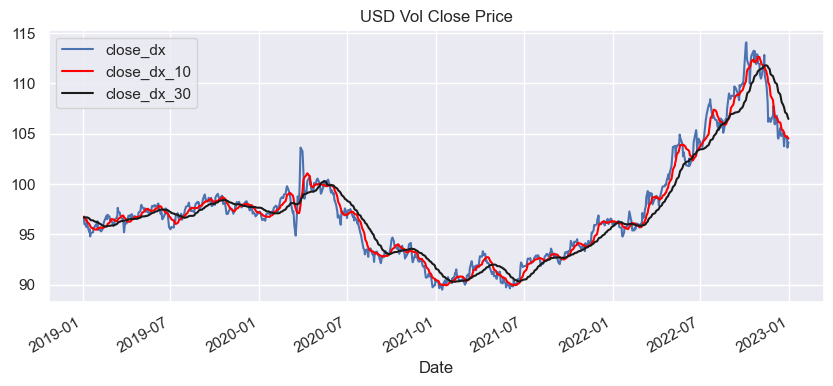

In [625]:
#Moving average
df2['close_dx_10']=df2['close_dx'].rolling(10).mean() #calculating rolling mean
df2['close_dx_30']=df2['close_dx'].rolling(30).mean()
ax = df2.loc['2019-01-01':'2022-12-31'].plot(y='close_dx',title='USD Vol Close Price',figsize=(10,4))
df2.loc['2019-01-01':'2022-12-31'].plot(y='close_dx_10',color='red',ax=ax)
df2.loc['2019-01-01':'2022-12-31'].plot(y='close_dx_30',color='k',ax=ax)
#plt.ioff()
plt.show()

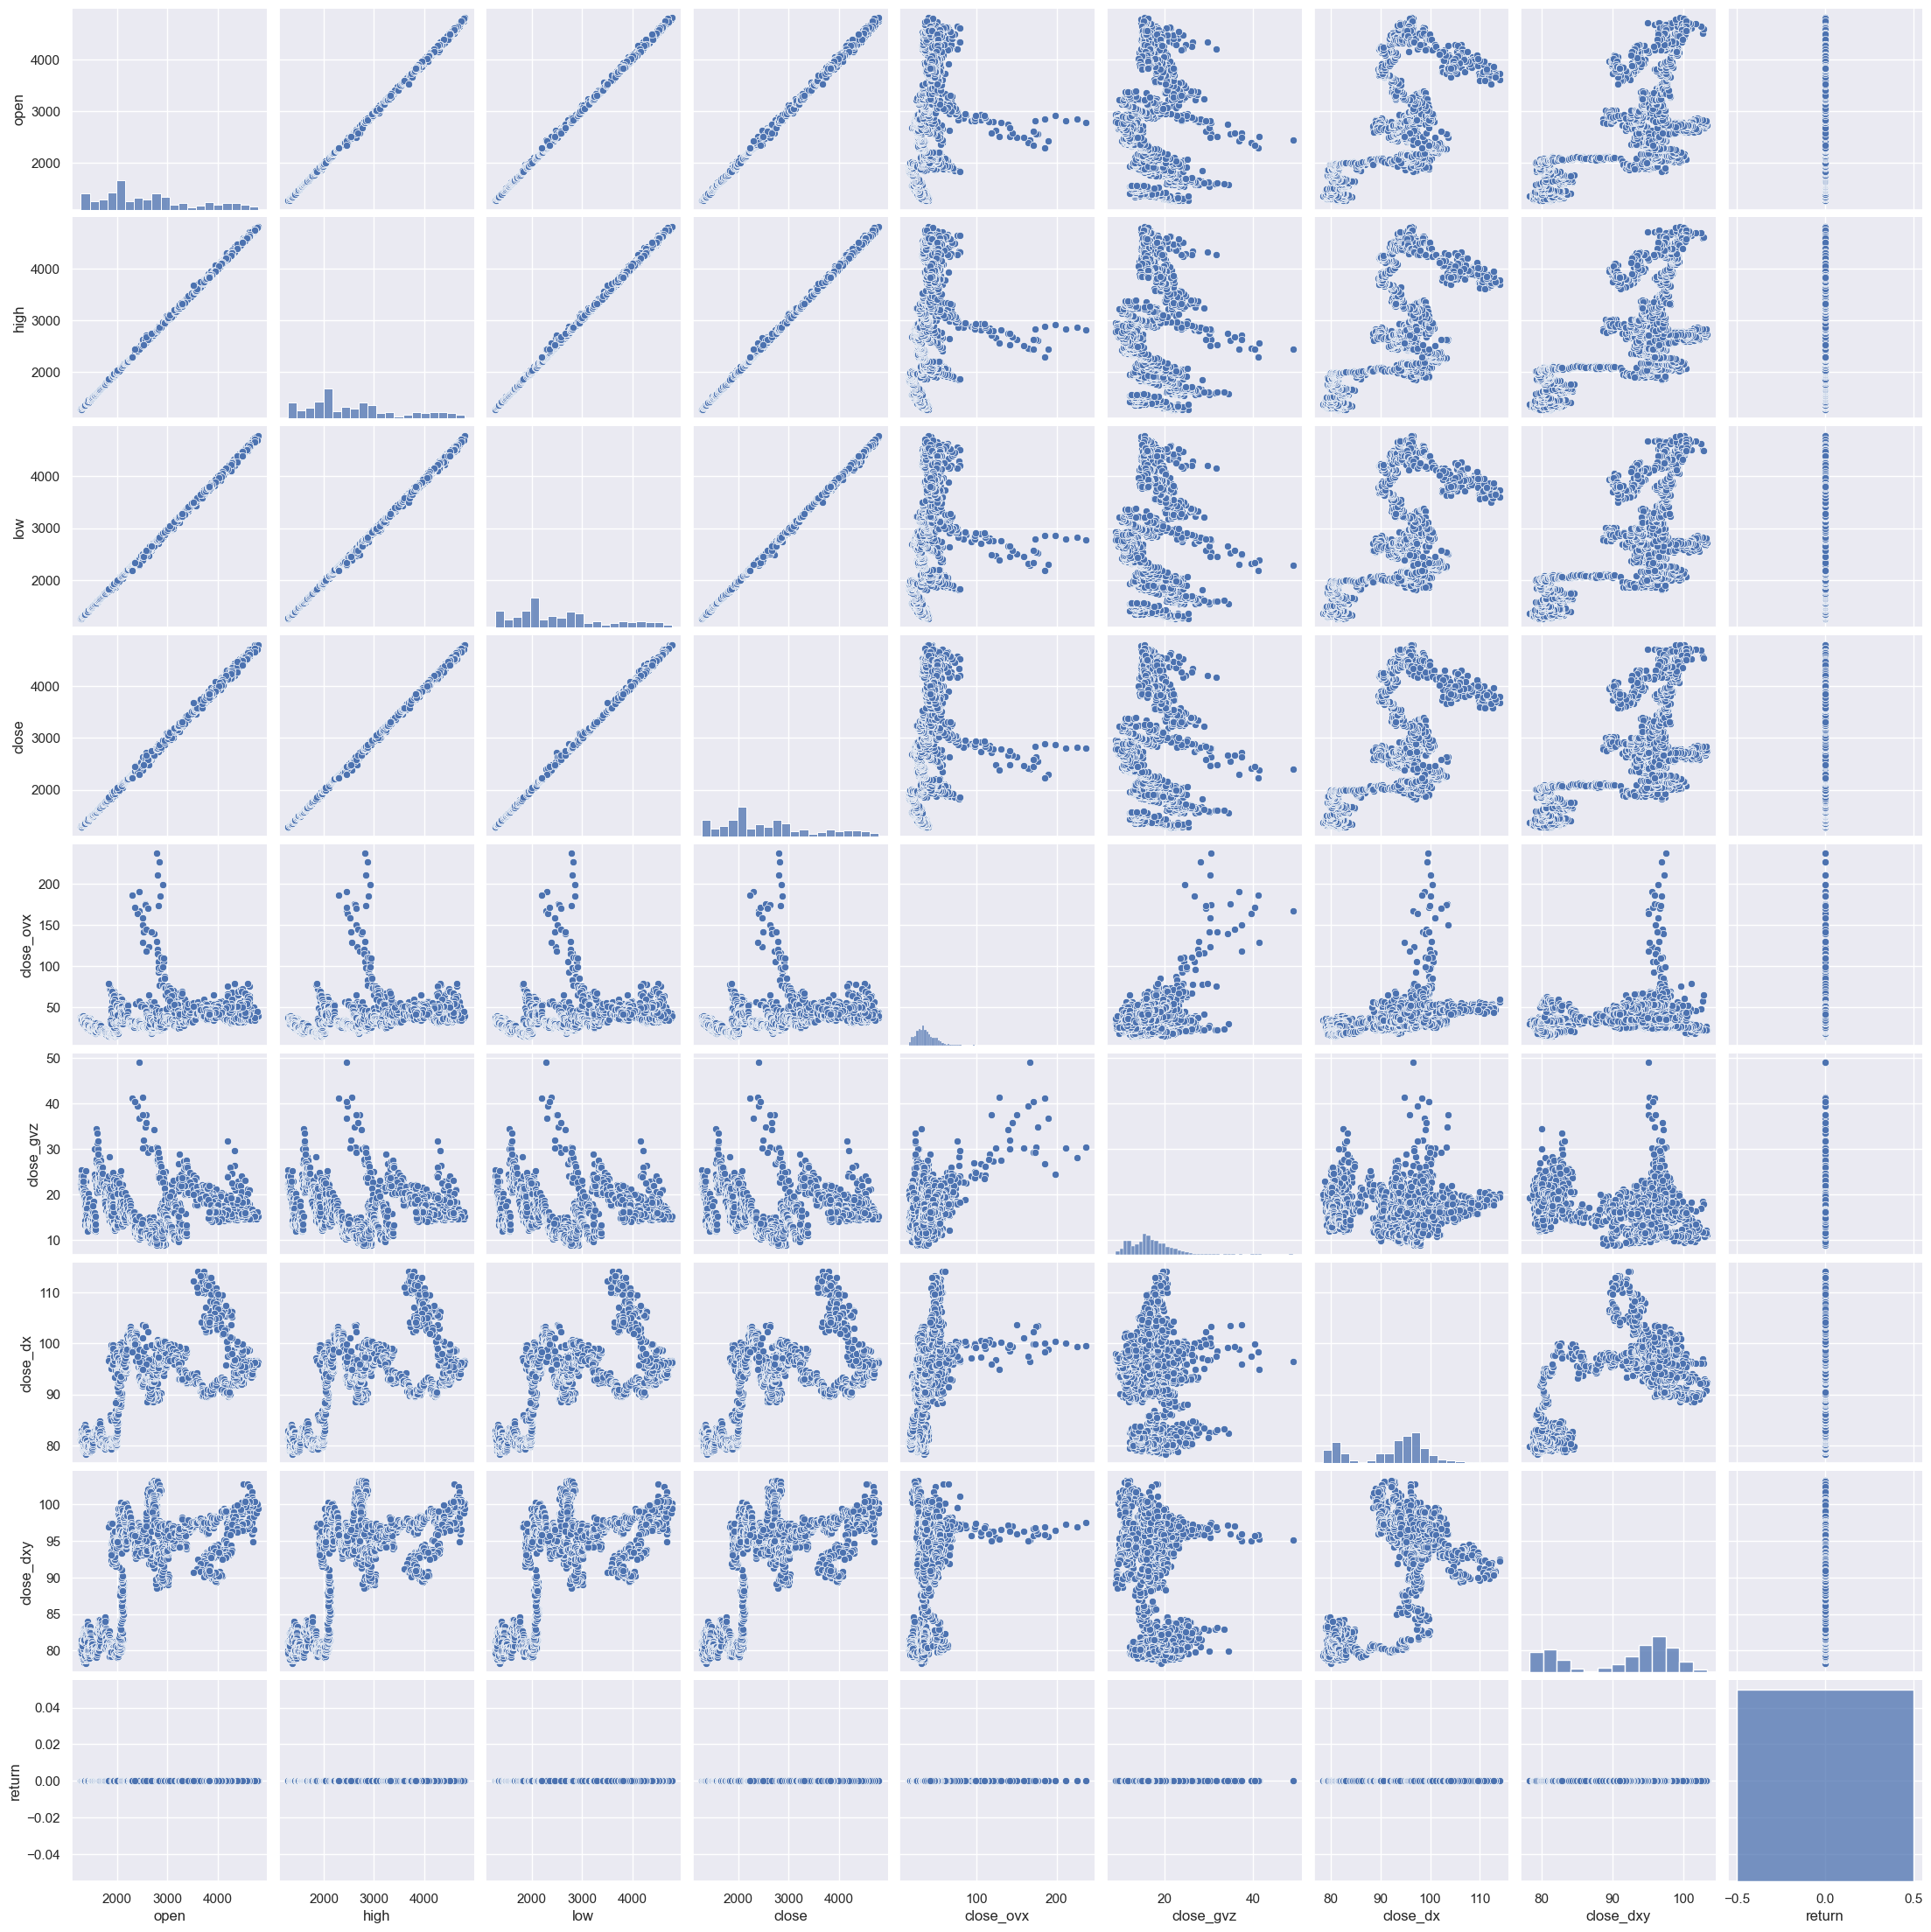

In [626]:
sns.pairplot(df[1:])
plt.show()

In [627]:
df2[['close','close_cl','close_ovx','close_gc','close_gvz','close_dx','close_dxy']].loc['2019-01-01':'2022-12-31']

close  close_cl  close_ovx  close_gc  close_gvz    close_dx  \
Date                                                                        
2019-01-03  2447.89     45.33  53.570000    1279.9  13.770000   96.568001   
2019-01-04  2531.94     45.41  51.520000    1278.3  12.040000   96.000999   
2019-01-07  2549.69     46.54  50.419998    1281.0  11.660000   95.964996   
2019-01-08  2574.41     47.09  46.080002    1291.8  11.160000   95.735001   
2019-01-09  2584.96     47.96  44.360001    1282.7  11.690000   96.422997   
...             ...       ...        ...       ...        ...         ...   
2022-12-22  3822.39     77.28  41.799999    1780.5  14.880000  104.531998   
2022-12-23  3844.82     76.11  41.209999    1813.9  14.860000  104.661003   
2022-12-27  3829.25     74.29  43.500000    1807.5  16.299999  104.595001   
2022-12-28  3783.22     75.19  43.950001    1777.2  15.990000  103.606003   
2022-12-30  3839.50     78.29  41.259998    1787.7  16.250000  104.126999   

            close_dxy  
Date                   
2019-01-03  93.279999  
2019-01-04  93.489998  
2019-01-07  93.360001  
2019-01-08  93.269997  
2019-01-09  93.699997  
...               ...  
2022-12-22  91.199997  
2022-12-23  91.120003  
2022-12-27  91.529999  
2022-12-28  91.040001  
2022-12-30  90.930000  

[827 rows x 7 columns]

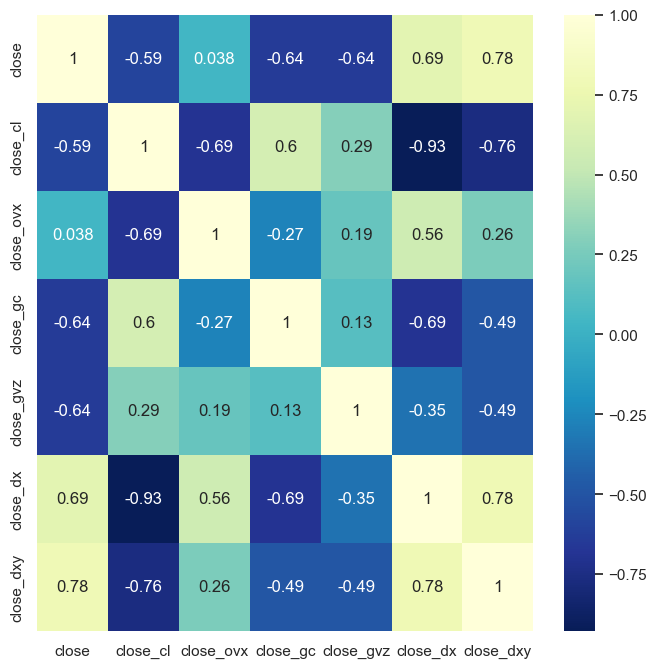

In [628]:
#df2[['close','close_cl','close_ovx','close_gc','close_gvz','close_dx','close_dxy']]
correlation = df2[['close','close_cl','close_ovx','close_gc','close_gvz','close_dx','close_dxy']].loc['2012-01-01':'2018-12-31'].corr()
plt.figure(figsize=(8,8))

sns.heatmap(correlation, annot=True, cmap='YlGnBu_r')
plt.show()

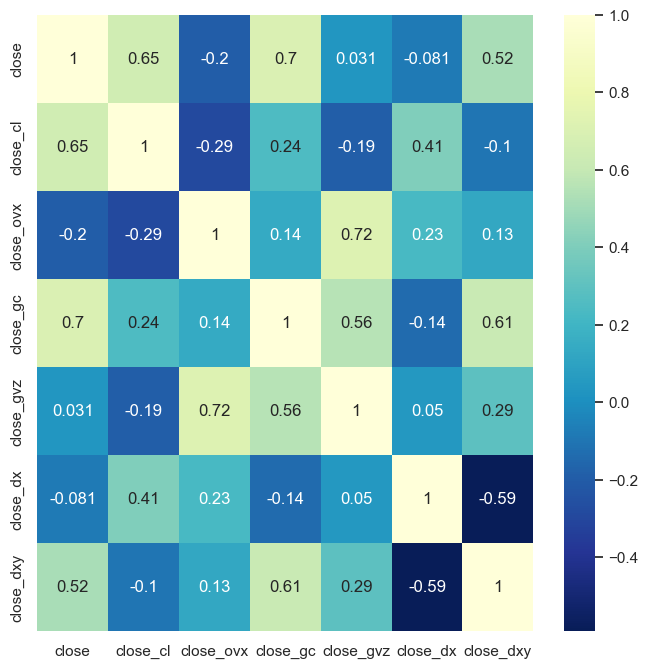

In [629]:
#df2[['close','close_cl','close_ovx','close_gc','close_gvz','close_dx','close_dxy']]
correlation = df2[['close','close_cl','close_ovx','close_gc','close_gvz','close_dx','close_dxy']].loc['2019-01-01':'2022-12-31'].corr()
plt.figure(figsize=(8,8))

sns.heatmap(correlation, annot=True, cmap='YlGnBu_r')
plt.show()

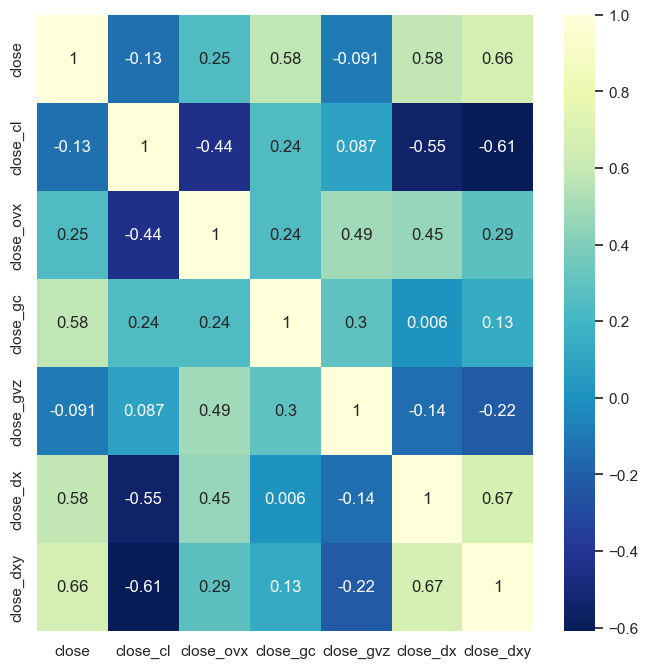

In [630]:
#df2[['close','close_cl','close_ovx','close_gc','close_gvz','close_dx','close_dxy']]
correlation = df2[['close','close_cl','close_ovx','close_gc','close_gvz','close_dx','close_dxy']].corr()
plt.figure(figsize=(8,8))

sns.heatmap(correlation, annot=True, cmap='YlGnBu_r')
plt.show()

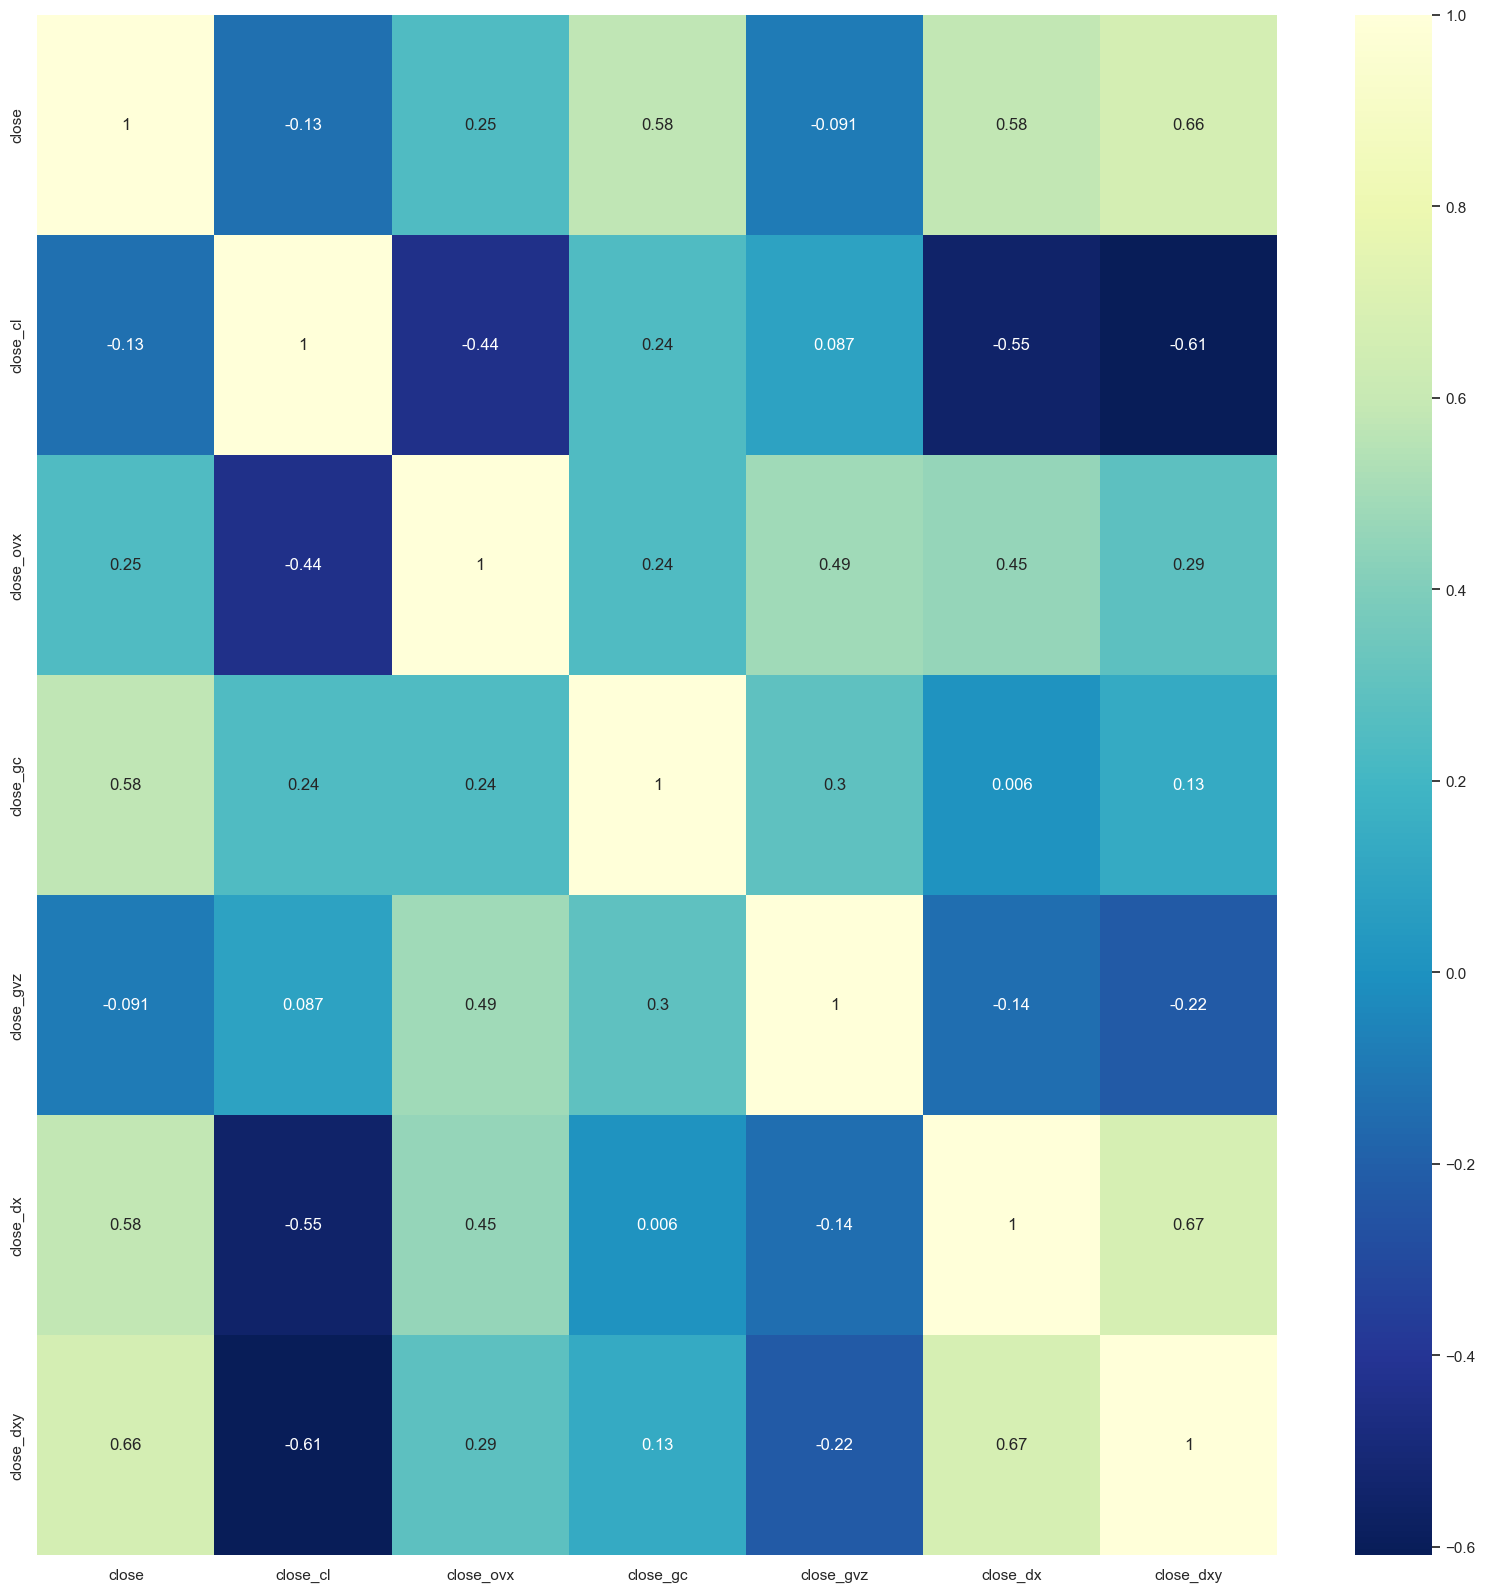

In [633]:
correlation = df2[['close','close_cl','close_ovx','close_gc','close_gvz','close_dx','close_dxy']].corr()
plt.figure(figsize=(20,20))

sns.heatmap(correlation, annot=True, cmap='YlGnBu_r')
plt.show()

In [634]:
# empty dataframe
returns = pd.DataFrame()

In [635]:
for rate in rates:
    returns[rate] = df2[rate].pct_change()

returns.head(3)

open      high     close  close_cl  close_ovx  close_gc  \
Date                                                                      
2012-01-04       NaN       NaN       NaN       NaN        NaN       NaN   
2012-01-05  0.000211  0.003378  0.002944 -0.013660  -0.008709  0.004653   
2012-01-06  0.002842 -0.000943 -0.002537 -0.002456  -0.040827 -0.002038   

            close_gvz  close_dx  close_dxy  
Date                                        
2012-01-04        NaN       NaN        NaN  
2012-01-05   0.011775  0.010258   0.006029  
2012-01-06  -0.046553  0.004271   0.010613

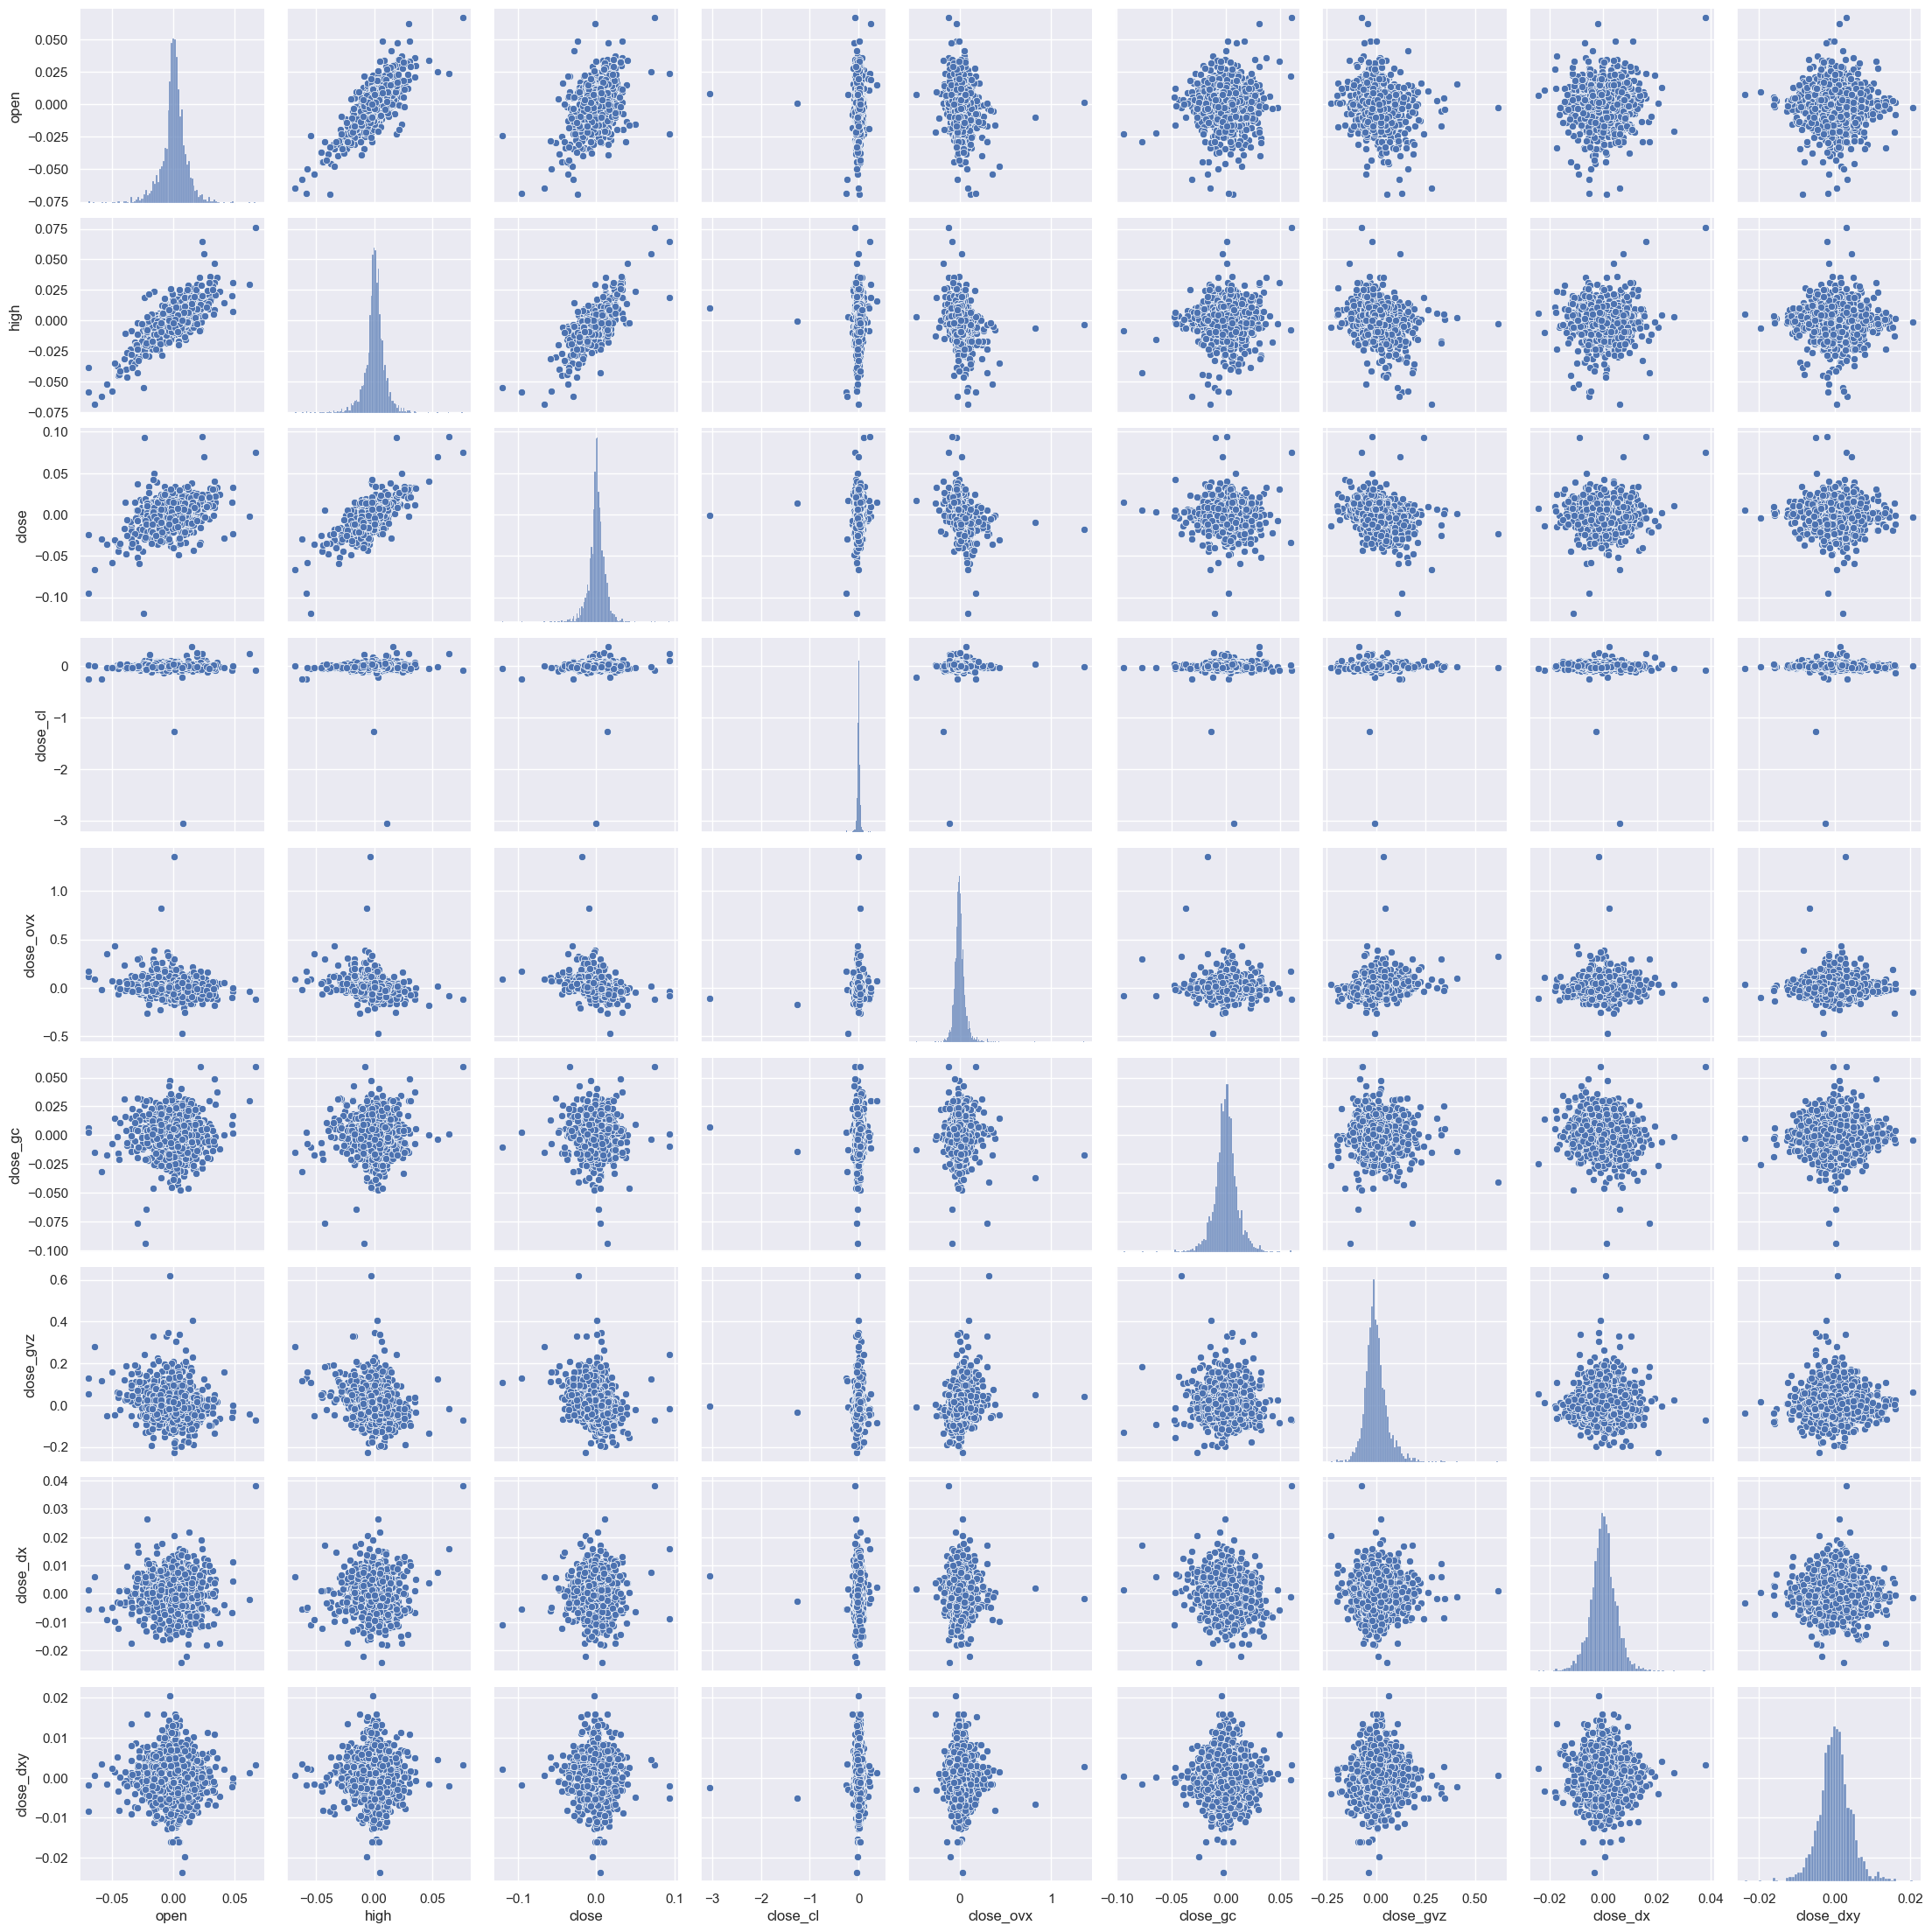

In [636]:
sns.pairplot(returns[1:])
plt.show()

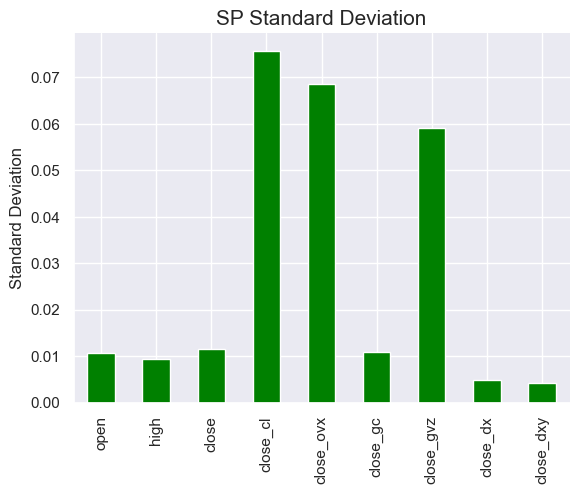

In [637]:
returns.std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation')
plt.title('SP Standard Deviation', fontsize=15)
sns.despine()
plt.show()

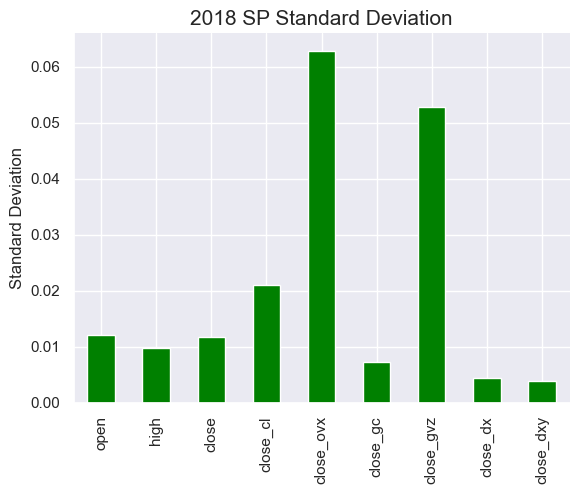

In [638]:
# 2018 Standard Deviation
returns.loc['2018-01-01':'2018-12-31'].std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation')
plt.title('2018 SP Standard Deviation', fontsize=15)
sns.despine()
plt.show()

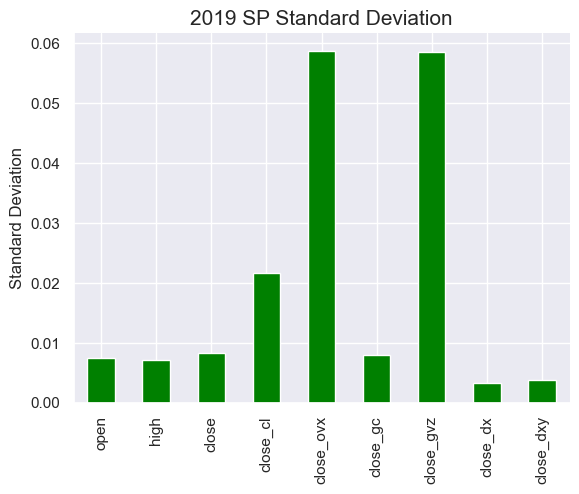

In [639]:
# 2019 Standard Deviation
returns.loc['2019-01-01':'2019-12-31'].std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation')
plt.title('2019 SP Standard Deviation', fontsize=15)
sns.despine()
plt.show()

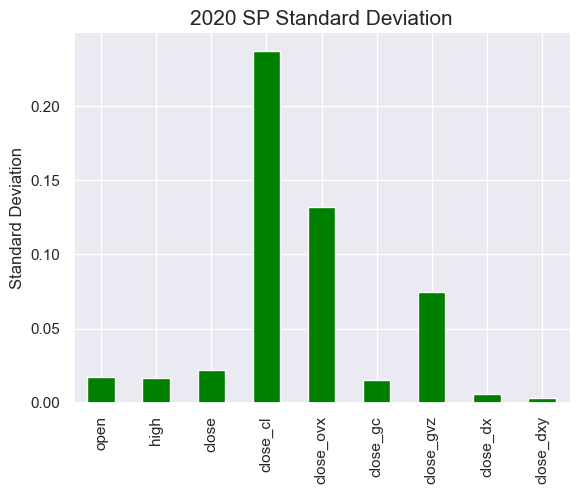

In [640]:
# 2020 Standard Deviation
returns.loc['2020-01-01':'2020-12-31'].std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation')
plt.title('2020 SP Standard Deviation', fontsize=15)
sns.despine()
plt.show()

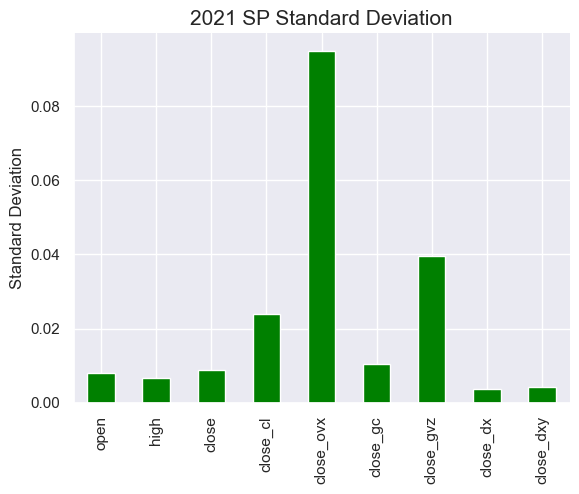

In [641]:
# 2020 Standard Deviation
returns.loc['2021-01-01':'2021-12-31'].std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation')
plt.title('2021 SP Standard Deviation', fontsize=15)
sns.despine()
plt.show()

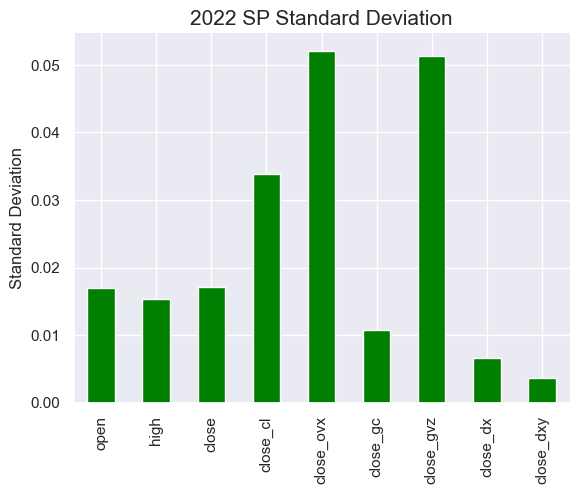

In [642]:
# 2022 Standard Deviation
returns.loc['2022-01-01':'2022-12-31'].std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation')
plt.title('2022 SP Standard Deviation', fontsize=15)
sns.despine()
plt.show()

C:\Users\Pankaj Suryavanssi\AppData\Local\Temp\ipykernel_12540\1582723035.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




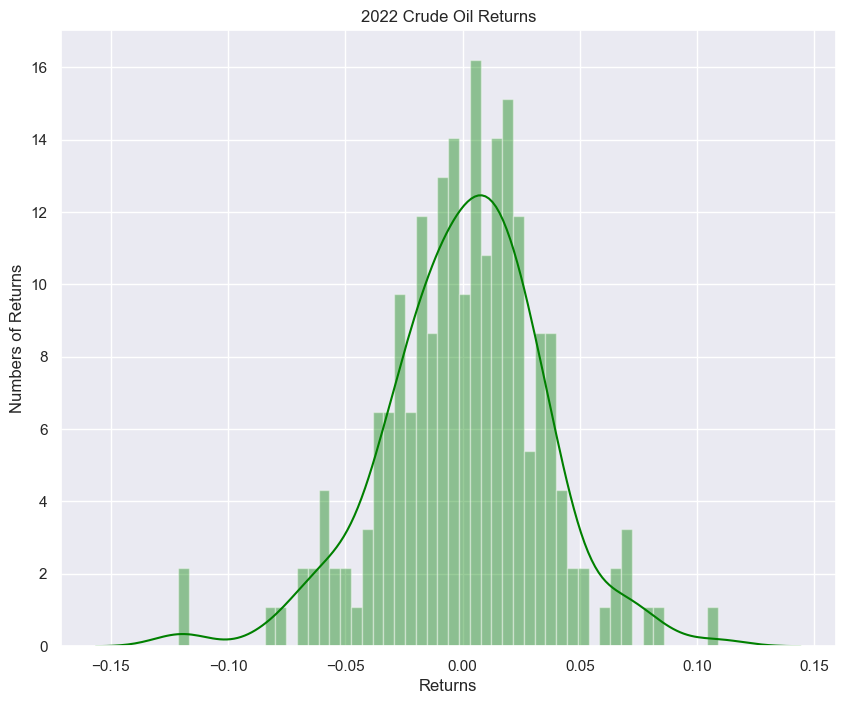

In [643]:
plt.figure(figsize=(10,8))
ax = sns.distplot(returns.loc['2022-01-01':'2022-12-31']['close_cl'], color='green', bins=50)
ax.set_title('2022 Crude Oil Returns')
ax.set_xlabel('Returns')
ax.set_ylabel('Numbers of Returns')
plt.show()

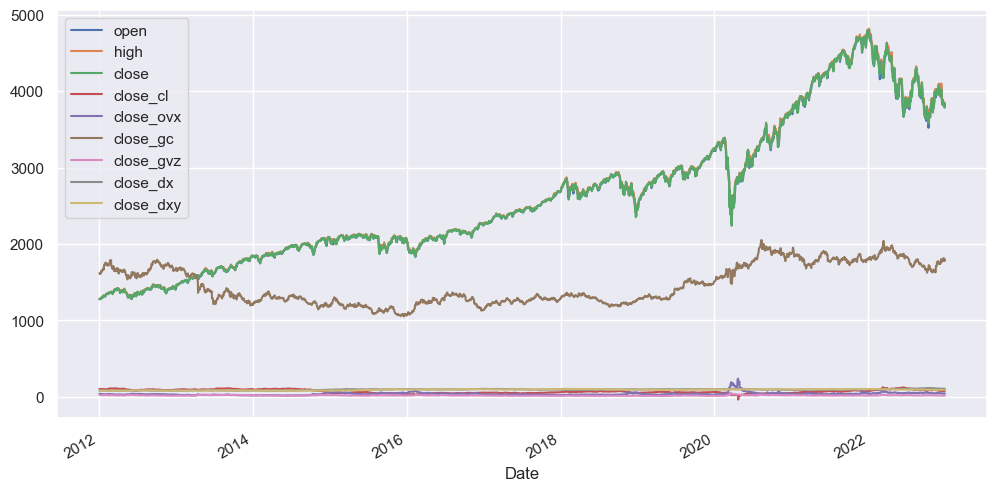

In [644]:
# Option N°1
for name in rates:
    df2[name].plot(label=name, figsize=(12,6))
plt.legend()
plt.show()

In [645]:
# Biggest single day losses
returns.idxmin()

open        2018-02-06
high        2022-06-13
close       2020-03-16
close_cl    2020-04-23
close_ovx   2020-04-30
close_gc    2013-04-16
close_gvz   2012-07-06
close_dx    2020-04-03
close_dxy   2016-09-28
dtype: datetime64[ns]

In [646]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
fig = make_subplots(rows=4, cols=2)


trace0 = go.Histogram(x=returns.loc['2018-01-01':'2022-12-31']['open'], nbinsx=50, name="open")
trace1 = go.Histogram(x=returns.loc['2018-01-01':'2022-12-31']['close'], nbinsx=50, name="close")
trace2 = go.Histogram(x=returns.loc['2018-01-01':'2022-12-31']['close_cl'], nbinsx=50, name="close_cl")
trace3 = go.Histogram(x=returns.loc['2018-01-01':'2022-12-31']['close_gc'], nbinsx=50, name="close_gc")
trace4 = go.Histogram(x=returns.loc['2018-01-01':'2022-12-31']['close_ovx'], nbinsx=50, name="close_ovx")
trace5 = go.Histogram(x=returns.loc['2018-01-01':'2022-12-31']['close_gvz'], nbinsx=50, name="close_gvz")
trace6 = go.Histogram(x=returns.loc['2018-01-01':'2022-12-31']['close_dx'], nbinsx=50, name="close_dx")
trace7 = go.Histogram(x=returns.loc['2018-01-01':'2022-12-31']['close_dxy'], nbinsx=50, name="close_dxy")

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.append_trace(trace6, 4, 1)
fig.append_trace(trace7, 4, 2)

fig.update_layout(title_text='SP Returns (2018 - 2022)')

fig.show()
plt.show()


In [647]:
def create_labels(df,col_name,window_size=11):
  row_counter = 0
  total_rows = len(df)
  labels = np.zeros(total_rows)
  labels[:]=np.nan
  while row_counter <total_rows:
    if row_counter>=window_size-1:
      window_begin=row_counter-(window_size-1)
      window_end=row_counter
      window_middle=(window_begin+window_end)/2
      min_=np.inf
      min_index=-1
      max_=-np.inf
      max_index=-1
      for i in range(window_begin,window_end+1):
        price = df.iloc[i][col_name]
        if price<min_:
          min_=price
          min_index=i
        elif price>max_:
          max_=price
          max_index=i
      if max_index == window_middle:
        labels[row_counter] = 2
      elif min_index == window_middle:
        labels[row_counter] = 0
      else:
        labels[row_counter] = 1
    row_counter = row_counter+1
  return labels
df['return'] = create_labels(df,'close')

In [648]:
ema = talib.EMA(df['close'])
sma = talib.SMA(df['close'])
roc = talib.ROC(df['close'])
macd, macdsignal, macdhist = talib.MACD(df['close'])
k, d = talib.STOCH (df['high'], df['low'], df['close'])
upper, middle, lower = talib.BBANDS(df['close'])
B = (df['close'] - lower)/(upper - lower)

dataset = pd.DataFrame({
    'Close':df['close'],    
    'EMA':ema,
    'SMA':sma,
    'ROC':roc,
    'MACD':macd,
    '%K':k,
    '%D':d,
    'Upper Band':upper,
    'Lower Band':lower,
    '%B':B,
    'Close_CL':df['close_cl'],
    'Close_OVX':df['close_ovx'],
    'Close_GC':df['close_gc'],
    'Close_GVZ':df['close_gvz'],
    'Close_DX':df['close_dx'],
#    'Close_DXY':df['close_dxy'],
    'return': df['return'],
})

feature_names = list(dataset.columns[:-1])

In [649]:
print("before dropping NaN", dataset.shape)
dataset = dataset.dropna()
print("after dropping NaN", dataset.shape)

before dropping NaN (2271, 16)
after dropping NaN (2238, 16)


In [650]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()

dataset_scaled = ss.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns, index=dataset.index)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

Close          EMA          SMA          ROC         MACD  \
count  2238.000000  2238.000000  2238.000000  2238.000000  2238.000000   
mean      0.386596     0.384143     0.386227     0.545689     0.748343   
std       0.259499     0.270867     0.270784     0.068189     0.099508   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.196708     0.189461     0.190477     0.517229     0.720238   
50%       0.331712     0.332653     0.335213     0.553264     0.761737   
75%       0.530373     0.523730     0.530759     0.581959     0.797014   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                %K           %D   Upper Band   Lower Band           %B  \
count  2238.000000  2238.000000  2238.000000  2238.000000  2238.000000   
mean      0.604855     0.597163     0.381032     0.379361     0.555708   
std       0.268268     0.255590     0.263674     0.254752     0.288805   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.386406     0.393859     0.188771     0.191613     0.285915   
50%       0.633558     0.632394     0.324461     0.330458     0.634708   
75%       0.848275     0.823715     0.529610     0.523157     0.802189   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Close_CL    Close_OVX     Close_GC    Close_GVZ     Close_DX  \
count  2238.000000  2238.000000  2238.000000  2238.000000  2238.000000   
mean      0.653391     0.103501     0.403138     0.192759     0.391442   
std       0.142310     0.085412     0.253378     0.110037     0.215411   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.538477     0.056669     0.198961     0.113778     0.250625   
50%       0.616562     0.088304     0.278605     0.180798     0.444526   
75%       0.795776     0.130983     0.656465     0.254551     0.525223   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            return  
count  2238.000000  
mean      1.013405  
std       0.356056  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       2.000000

1.0    1954
2.0     157
0.0     127
Name: return, dtype: int64


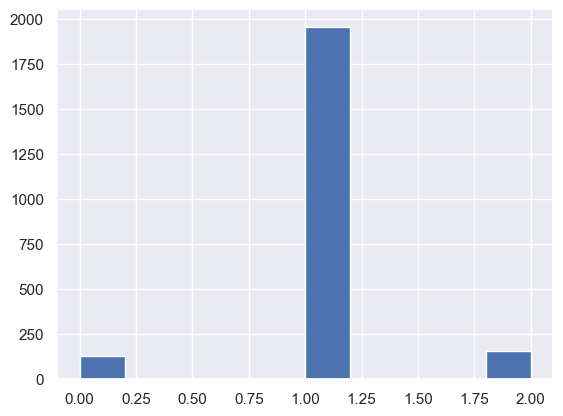

In [651]:
result = pd.value_counts(dataset_scaled['return'])
print(result)
dataset_scaled['return'].hist()
plt.show()

In [652]:
#!pip install tensorflow

In [653]:
from keras.utils import np_utils
#Number of days included in each image
time_period = 20
#days for predicting 
day = 1

cnn_x = []
cnn_y = []
indexs = []
dataset_scaled_x= dataset_scaled[feature_names]

for i in tqdm.tqdm_notebook(range(0, len(dataset_scaled)-time_period-1-day)):
    cnn_x.append(dataset_scaled_x.iloc[i:i+time_period].values)
    r = dataset_scaled['return'].iloc[i+time_period-1+day]
    rr = np_utils.to_categorical(r, num_classes=3)
    cnn_y.append(rr)
    indexs.append(dataset_scaled.index[i+time_period-1])
    
cnn_x = np.array(cnn_x)
cnn_y = np.array(cnn_y)
indexes = np.array(indexs)

C:\Users\Pankaj Suryavanssi\AppData\Local\Temp\ipykernel_12540\3785369239.py:12: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/2216 [00:00<?, ?it/s]

In [654]:
#2012~2022 for training and testing，year 2022 is for validation 
import datetime
cnn_x_t = cnn_x[indexes < datetime.datetime(2022,1,1)]
cnn_y_t = cnn_y[indexes < datetime.datetime(2022,1,1)]
cnn_x_validation = cnn_x[indexes > datetime.datetime(2022,1,1)]
cnn_y_validation = cnn_y[indexes > datetime.datetime(2022,1,1)]

In [655]:
from sklearn.model_selection import train_test_split
cnn_x_train, cnn_x_test, cnn_y_train, cnn_y_test = train_test_split(cnn_x_t, cnn_y_t, 
                                                                    test_size=0.2,
                                                                    random_state =0,
                                                                    stratify=cnn_y_t,
                                                                    shuffle = True)

In [656]:
cnn_x_train = np.stack((cnn_x_train,)*3,axis=-1)
cnn_x_test = np.stack((cnn_x_test,)*3,axis=-1)
cnn_x_validation = np.stack((cnn_x_validation,)*3,axis=-1)

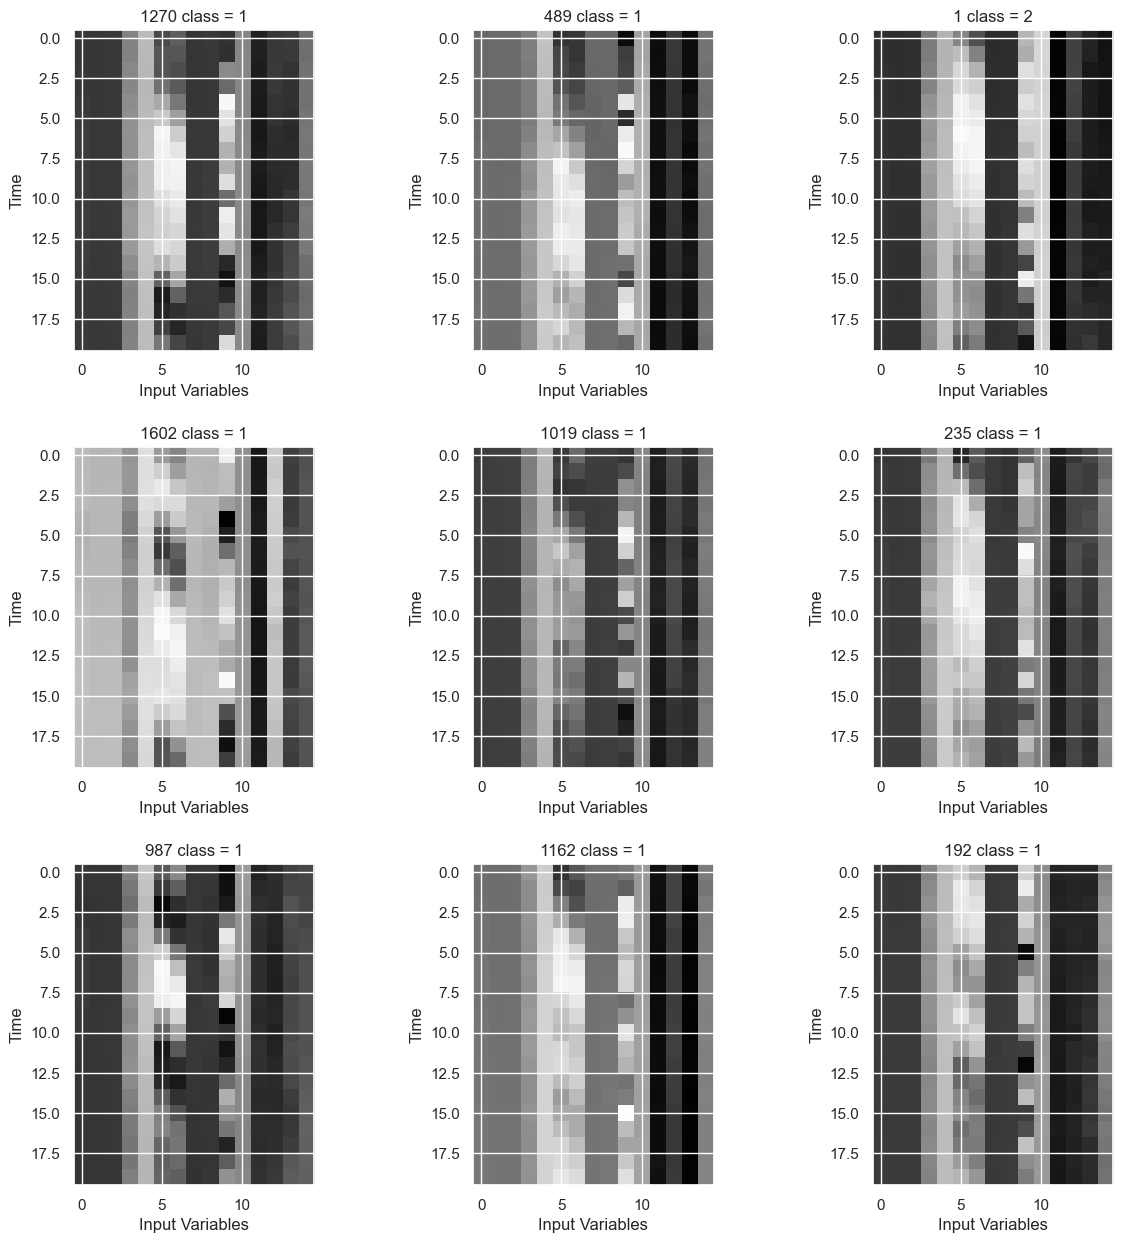

In [657]:
fig = plt.figure(figsize = (15,15))
columns = rows = 3
for i in range(1,columns*rows+1):
  index = np.random.randint(len(cnn_x_train))
  img = cnn_x_train[index]
  fig.add_subplot(rows,columns,i)
  #plt.axis("off")
  plt.title(str(index)+' class = '+str(np.argmax(cnn_y_train[index])))
  plt.xlabel("Input Variables")
  plt.ylabel("Time")
  plt.subplots_adjust(wspace=0.1,hspace=0.3)
  plt.imshow(img)
plt.show()

In [658]:
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
def get_sample_weights(y):
    y = y.astype(int)
    class_weight = compute_class_weight(class_weight = "balanced", classes= np.unique(y), y= y)
    print("real class weight are{}".format(class_weight),np.unique(y))
    print("value_counts",np.unique(y,return_counts=True))
    sample_weights = y.copy().astype(float)
    for i in np.unique(y):
        sample_weights[sample_weights==i]=class_weight[i]
        return class_weight,sample_weights

In [659]:
# transforming from onehot encoding to groups of numbers
lable = np.argmax(cnn_y_train, axis=1)
lable = np.array(lable)
class_weight,sample_weights = get_sample_weights(lable)

real class weight are[5.72340426 0.38128987 4.93577982] [0 1 2]
value_counts (array([0, 1, 2]), array([  94, 1411,  109], dtype=int64))


In [660]:
class_weight={0:class_weight[0],
              1:class_weight[1],
              2:class_weight[2],}
print(class_weight)

{0: 5.723404255319149, 1: 0.38128986534372783, 2: 4.935779816513762}


In [661]:
import tensorflow.keras
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import he_normal

input_shape = cnn_x_train[0].shape

def get_model(dropout1_rate=0.5, dropout2_rate=0.5):
    model = Sequential()
    model.add(layers.Conv2D(filters=32, 
                            kernel_size=(3,3), 
                            activation='relu',
                            padding="same",
                            input_shape=input_shape))
    model.add(layers.Conv2D(filters=64, 
                            kernel_size=(3,3), 
                            padding="same", 
                            activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(dropout1_rate, name="dropout_1"))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dropout(dropout2_rate, name="dropout_2"))
    model.add(layers.Dense(units=3, activation='softmax'))
    return model

In [662]:
from tensorflow.keras.callbacks import EarlyStopping 
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

def fit_with(dropout1_rate, dropout2_rate, lr, batchsize):

    # batchsize can only be an integer, tranfsforming type from float into int
    batchsize = int(batchsize)

    # Create a model using the specified hyperparameters.
    model = get_model(dropout1_rate, dropout2_rate)
    
    # Set the optimizer, learning rate and build the model
    optimizer = tensorflow.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    
    # training
    model.fit(cnn_x_train, cnn_y_train,
              batch_size = batchsize,
              epochs=250,
              verbose=0,
              validation_data=(cnn_x_test,cnn_y_test),
              callbacks=[earlystop],
              class_weight=class_weight,
              )
    # steps=10 
    # score = model.evaluate(cnn_x_test,cnn_y_test, steps=10, verbose=0)
    # evaluate
    score = model.evaluate(cnn_x_test, cnn_y_test, verbose=0)
    #print('Test loss:', score[0])
    #print('Test accuracy:', score[1])

    return score[1]

In [663]:
#!pip install bayesian-optimization==1.4.1.

In [664]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(
        fit_with,
        {'dropout1_rate': (0, 0.5),
        'dropout2_rate': (0, 0.5),
        'lr': (1e-5, 1e-2),
        'batchsize': (16,128)}
    )
optimizer.maximize(init_points=10, n_iter=20)

|   iter    |  target   | batchsize | dropou... | dropou... |    lr     |
-------------------------------------------------------------------------
Epoch 36: early stopping
| 1         | 0.05693   | 108.0     | 0.439     | 0.2079    | 0.009289  |
Epoch 17: early stopping
| 2         | 0.06931   | 39.77     | 0.3131    | 0.2803    | 0.009012  |
Epoch 11: early stopping
| 3         | 0.06931   | 61.26     | 0.1192    | 0.1418    | 0.007022  |
Epoch 24: early stopping
| 4         | 0.6584    | 48.2      | 0.4506    | 0.4276    | 0.006817  |
Epoch 27: early stopping
| 5         | 0.7772    | 88.58     | 0.3124    | 0.2396    | 0.00436   |
Epoch 23: early stopping
| 6         | 0.06931   | 23.85     | 0.4492    | 0.4736    | 0.007423  |
Epoch 38: early stopping
| 7         | 0.7426    | 80.57     | 0.4407    | 0.03473   | 0.0003416 |
Epoch 20: early stopping
| 8         | 0.703     | 70.84     | 0.1356    | 0.3441    | 0.0016    |
Epoch 43: early stopping
| 9         | 0.7327    | 118.6    

In [665]:
print(optimizer.max)
print(optimizer.max['params']['dropout1_rate'])
print(optimizer.max['params']['dropout2_rate'])
print(optimizer.max['params']['lr'])
print(optimizer.max['params']['batchsize'])
##Using Bayesian Optimization to find the best parameters 
dropout_rate1 = optimizer.max['params']['dropout1_rate']
dropout_rate2 = optimizer.max['params']['dropout2_rate']
learning_rate = optimizer.max['params']['lr']
batchsize = int(optimizer.max['params']['batchsize'])

{'target': 0.8737623691558838, 'params': {'batchsize': 31.791537305658245, 'dropout1_rate': 0.0, 'dropout2_rate': 0.0, 'lr': 0.01}}
0.0
0.0
0.01
31.791537305658245


In [666]:
#dropout_rate1 = 0.4638
#dropout_rate2 = 0.04089
#learning_rate =  0.001952
#batchsize = int(69.01)
dropout_rate1 = 0.1788
dropout_rate2 = 0.1516
learning_rate =  0.0009
batchsize = int(70.64)

In [667]:
import tensorflow.keras
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import he_normal

input_shape = cnn_x_train[0].shape

model = Sequential()
model.add(layers.Conv2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                        padding="same",
                        input_shape=input_shape))
model.add(layers.Conv2D(filters=64, 
                        kernel_size=(3,3), 
                        padding="same", 
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(dropout_rate1, name="dropout_1"))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dropout(dropout_rate2, name="dropout_2"))
model.add(layers.Dense(units=3, activation='softmax'))

adam = tensorflow.keras.optimizers.Adam(learning_rate)

model.compile(loss='categorical_crossentropy',optimizer=adam, metrics=['accuracy'])
print(model.summary())

Model: "sequential_231"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_436 (Conv2D)         (None, 20, 15, 32)        896       
                                                                 
 conv2d_437 (Conv2D)         (None, 20, 15, 64)        18496     
                                                                 
 max_pooling2d_218 (MaxPooli  (None, 10, 7, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 10, 7, 64)         0         
                                                                 
 flatten_218 (Flatten)       (None, 4480)              0         
                                                                 
 dense_462 (Dense)           (None, 128)               573568    
                                                    

In [668]:
from tensorflow.keras.callbacks import EarlyStopping 
earlystop = EarlyStopping(monitor='val_loss', patience=8, verbose=1)

history = model.fit(cnn_x_train, cnn_y_train,
                    batch_size=batchsize,
                    epochs=250,
                    verbose=1,
                    validation_data=(cnn_x_test,cnn_y_test),
                    callbacks=[earlystop],
                    #sample_weight=sample_weights,
                    class_weight=class_weight,
                    )

Epoch 1/250
24/24 [==============================] - 5s 123ms/step - loss: 1.1059 - accuracy: 0.3482 - val_loss: 1.0519 - val_accuracy: 0.0644
Epoch 2/250
24/24 [==============================] - 3s 105ms/step - loss: 0.9238 - accuracy: 0.3383 - val_loss: 0.9817 - val_accuracy: 0.4381
Epoch 3/250
24/24 [==============================] - 3s 109ms/step - loss: 0.6871 - accuracy: 0.5533 - val_loss: 0.6949 - val_accuracy: 0.6337
Epoch 4/250
24/24 [==============================] - 3s 109ms/step - loss: 0.6194 - accuracy: 0.5812 - val_loss: 0.9627 - val_accuracy: 0.5124
Epoch 5/250
24/24 [==============================] - 3s 119ms/step - loss: 0.5178 - accuracy: 0.6307 - val_loss: 0.7395 - val_accuracy: 0.6188
Epoch 6/250
24/24 [==============================] - 3s 115ms/step - loss: 0.4592 - accuracy: 0.6667 - val_loss: 0.5679 - val_accuracy: 0.7054
Epoch 7/250
24/24 [==============================] - 3s 113ms/step - loss: 0.4452 - accuracy: 0.6784 - val_loss: 0.5664 - val_accuracy: 0.7426

In [669]:
o_loss,o_accuracy = model.evaluate(cnn_x_train,cnn_y_train)
print("For training data：\nLoss: %.2f, Accuracy: %.2f" % (o_loss, o_accuracy))
n_loss,n_accuracy = model.evaluate(cnn_x_test,cnn_y_test)
print("For testing data：\nLoss: %.2f, Accuracy: %.2f" % (n_loss, n_accuracy))

51/51 [==============================] - 1s 19ms/step - loss: 0.2292 - accuracy: 0.9033
For training data：
Loss: 0.23, Accuracy: 0.90
13/13 [==============================] - 0s 17ms/step - loss: 0.3556 - accuracy: 0.8317
For testing data：
Loss: 0.36, Accuracy: 0.83


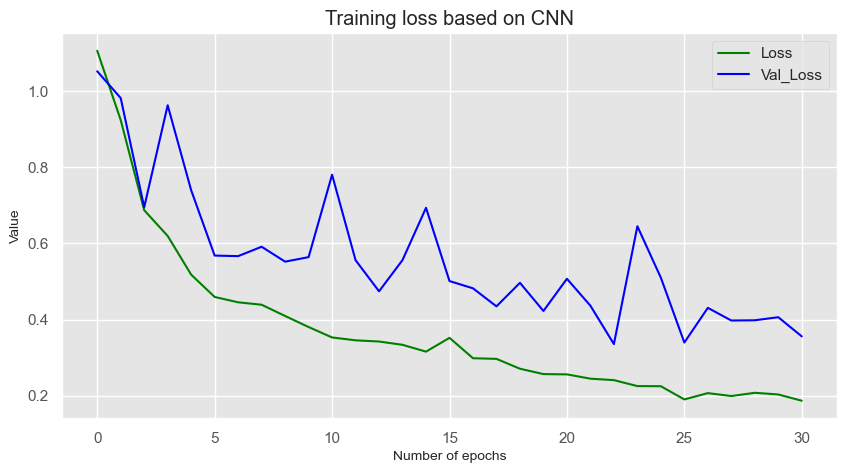

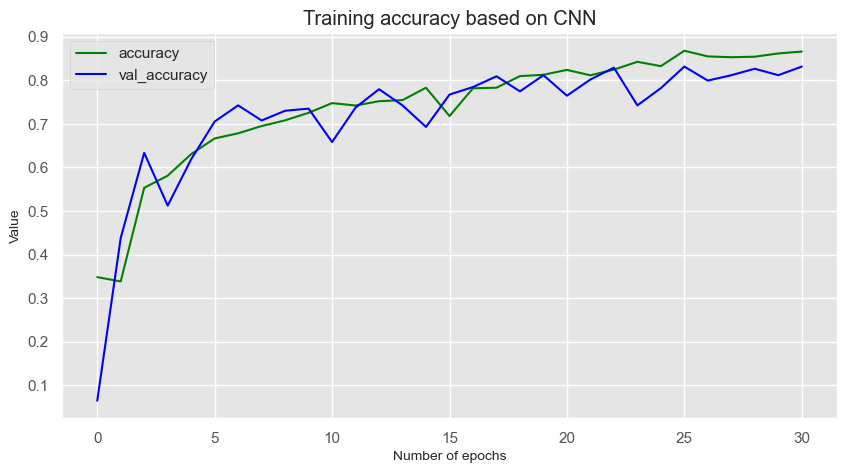

In [670]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], color = 'green', label='Loss')
plt.plot(history.history['val_loss'], color = 'blue', label='Val_Loss')
plt.legend()
plt.title('Training loss based on CNN')
plt.ylabel('Value')
plt.xlabel('Number of epochs')
plt.show()
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], color = 'green', label='accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label='val_accuracy')
plt.legend()
plt.title('Training accuracy based on CNN')
plt.ylabel('Value')
plt.xlabel('Number of epochs')
plt.show()

In [671]:
#transform onehot encloding to group of numbers
cnn_y_test = np.argmax(cnn_y_test, axis=1)
xcnn_y_test = pd.Series(cnn_y_test)
#predict the testing data
#pre = model.predict_classes(cnn_x_test)
#y_pred_prob = model.predict(cnn_x_test)
#pre = np.round(y_pred_prob)
#pre = pd.Series(pre.ravel())
#pre.hist()

In [672]:
#pre = model.predict_classes(cnn_x_test)
#y_pred_prob = model.predict(cnn_x_test)
pre = np.argmax(model.predict(cnn_x_test), axis=-1)
#pre.hist()

13/13 [==============================] - 0s 16ms/step


In [673]:
len(xcnn_y_test)

404

For training data：Loss: 0.23, Accuracy: 0.90
For testing data：Loss: 0.36, Accuracy: 0.83

Total number of testing data is：404.00 
The number of Buy is: 28.00, The correct rate of predicting Buy is: 0.07

The number of Hold is: 353.00, 
The correct rate of predicting Hold is: 0.87

The number of Sell is: 23.00, 
The coorect rate of predicting Sell is: 0.06

The Accuracy of testing data are: 0.83 
Precision(Buy): 0.50, Recall(Buy): 0.91, F1 score(Buy): 0.65
Precision(Hold): 0.97, Recall(Hold): 0.83, F1 score(Hold): 0.90
Precision(Sell): 0.36, Recall(Sell): 0.79, F1 score(Sell): 0.49


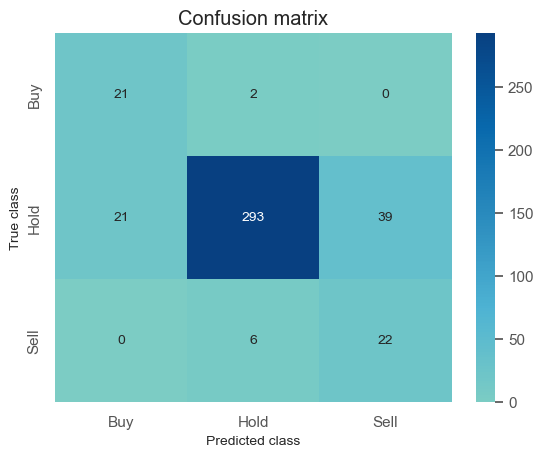

In [674]:
from sklearn.metrics import confusion_matrix

LABELS = ["Buy","Hold","Sell"]
conf_matrix = confusion_matrix(xcnn_y_test, pre)
#source raw data
t_size = len(cnn_y_test)
b_size = (cnn_y_test>=2).sum()
s_size = (cnn_y_test<=0).sum()
h_size = t_size-(b_size+s_size)
b_guess = b_size/t_size
s_guess = s_size/t_size
h_guess = h_size/t_size
#confusion matrix
c00 = conf_matrix[0][0]
c01 = conf_matrix[0][1]
c02 = conf_matrix[0][2]
c10 = conf_matrix[1][0]
c11 = conf_matrix[1][1]
c12 = conf_matrix[1][2]
c20 = conf_matrix[2][0]
c21 = conf_matrix[2][1]
c22 = conf_matrix[2][2]
#metrics
accuracy = (c00+c11+c22)/t_size
precision_b = c00/(c00+c10+c20)
precision_h = c11/(c01+c11+c21)
precision_s = c22/(c02+c12+c22)
recall_b = c00/(c00+c01+c02)
recall_h = c11/(c10+c11+c12)
recall_s = c22/(c20+c21+c22)
F1_b = 2*((precision_b*recall_b)/(precision_b+recall_b))
F1_h = 2*((precision_h*recall_h)/(precision_h+recall_h))
F1_s = 2*((precision_s*recall_s)/(precision_s+recall_s))
#print out the results
print("For training data：Loss: %.2f, Accuracy: %.2f" % (o_loss, o_accuracy))
print("For testing data：Loss: %.2f, Accuracy: %.2f" % (n_loss, n_accuracy))
print("\nTotal number of testing data is：%.2f \nThe number of Buy is: %.2f, The correct rate of predicting Buy is: %.2f" % (t_size, b_size, b_guess))
print("\nThe number of Hold is: %.2f, \nThe correct rate of predicting Hold is: %.2f" % (h_size, h_guess))
print("\nThe number of Sell is: %.2f, \nThe coorect rate of predicting Sell is: %.2f" % (s_size, s_guess))
print("\nThe Accuracy of testing data are: %.2f \nPrecision(Buy): %.2f, Recall(Buy): %.2f, F1 score(Buy): %.2f" % (accuracy, precision_b, recall_b, F1_b))
print("Precision(Hold): %.2f, Recall(Hold): %.2f, F1 score(Hold): %.2f" % (precision_h, recall_h, F1_h))
print("Precision(Sell): %.2f, Recall(Sell): %.2f, F1 score(Sell): %.2f" % (precision_s, recall_s, F1_s))
#draw 
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",center=0.7,cmap = 'GnBu');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [675]:
#Transform onehot encoding to cnn_x_validation
cnn_y_validation = np.argmax(cnn_y_validation, axis=1)
xcnn_y_validation = pd.Series(cnn_y_validation)
#predicting
#pre = model.predict_classes(cnn_x_validation)
#pre = pd.Series(pre)
#pre.hist()
pre = np.argmax(model.predict(cnn_x_validation), axis=-1)

7/7 [==============================] - 0s 18ms/step


For training data：Loss: 0.23, Accuracy: 0.90
For testing data：Loss: 0.36, Accuracy: 0.83

The number of testing data is：198.00 
The number of Buy is : 18.00, 
The correct predicting rate of Buy is: 0.09
The total number of Hold is: 172.00, 
The correct predicting rate of Hold is: 0.87
The total number of Sell is: 8.00, 
The correct predicting rate of Sell is: 0.04

The Accuracy of testing data is : 0.83 
Precision(Buy): 0.22, Recall(Buy): 0.25, F1 score(Buy): 0.24
Precision(Hold): 0.95, Recall(Hold): 0.84, F1 score(Hold): 0.90
Precision(Sell): 0.46, Recall(Sell): 0.94, F1 score(Sell): 0.62


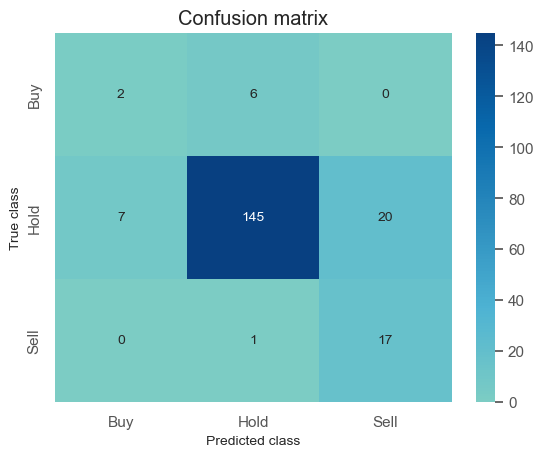

In [676]:
from sklearn.metrics import confusion_matrix

LABELS = ["Buy","Hold","Sell"]
conf_matrix = confusion_matrix(xcnn_y_validation, pre)

#raw data
t_size = len(cnn_y_validation)
b_size = (cnn_y_validation>=2).sum()
s_size = (cnn_y_validation<=0).sum()
h_size = t_size-(b_size+s_size)
b_guess = b_size/t_size
s_guess = s_size/t_size
h_guess = h_size/t_size
#confusion matrix
c00 = conf_matrix[0][0]
c01 = conf_matrix[0][1]
c02 = conf_matrix[0][2]
c10 = conf_matrix[1][0]
c11 = conf_matrix[1][1]
c12 = conf_matrix[1][2]
c20 = conf_matrix[2][0]
c21 = conf_matrix[2][1]
c22 = conf_matrix[2][2]
#evaluation metrics
accuracy = (c00+c11+c22)/t_size
precision_b = c00/(c00+c10+c20)
precision_h = c11/(c01+c11+c21)
precision_s = c22/(c02+c12+c22)
recall_b = c00/(c00+c01+c02)
recall_h = c11/(c10+c11+c12)
recall_s = c22/(c20+c21+c22)
F1_b = 2*((precision_b*recall_b)/(precision_b+recall_b))
F1_h = 2*((precision_h*recall_h)/(precision_h+recall_h))
F1_s = 2*((precision_s*recall_s)/(precision_s+recall_s))
#
print("For training data：Loss: %.2f, Accuracy: %.2f" % (o_loss, o_accuracy))
print("For testing data：Loss: %.2f, Accuracy: %.2f" % (n_loss, n_accuracy))
print("\nThe number of testing data is：%.2f \nThe number of Buy is : %.2f, \nThe correct predicting rate of Buy is: %.2f" % (t_size, b_size, b_guess))
print("The total number of Hold is: %.2f, \nThe correct predicting rate of Hold is: %.2f" % (h_size, h_guess))
print("The total number of Sell is: %.2f, \nThe correct predicting rate of Sell is: %.2f" % (s_size, s_guess))
print("\nThe Accuracy of testing data is : %.2f \nPrecision(Buy): %.2f, Recall(Buy): %.2f, F1 score(Buy): %.2f" % (accuracy, precision_b, recall_b, F1_b))
print("Precision(Hold): %.2f, Recall(Hold): %.2f, F1 score(Hold): %.2f" % (precision_h, recall_h, F1_h))
print("Precision(Sell): %.2f, Recall(Sell): %.2f, F1 score(Sell): %.2f" % (precision_s, recall_s, F1_s))
#draw
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",center=0.7,cmap = 'GnBu');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [677]:
result = pd.value_counts(xcnn_y_validation)
print(result)

1    172
2     18
0      8
dtype: int64


In [678]:
indexes = indexes[indexes > datetime.datetime(2022,1,1)]
f = df['close'][2073:]
a = []
w = []
b = []
for i in range(len(f)):
  w.append(indexes[i])
  a.append(f[i])
  #b.append(pre[i])
  b.append(xcnn_y_validation[i])
a = np.array(a)
b = np.array(b)

S_dataset = pd.DataFrame({
    'time':w,
    'price':a,    
    'signal':b,
}) 

In [679]:
S_dataset.head(20)

time    price  signal
0  2022-01-03  4696.05       1
1  2022-01-04  4670.29       1
2  2022-01-05  4713.07       1
3  2022-01-06  4726.35       1
4  2022-01-10  4659.03       2
5  2022-01-11  4662.85       1
6  2022-01-12  4532.76       1
7  2022-01-13  4482.73       1
8  2022-01-14  4397.94       1
9  2022-01-19  4410.13       1
10 2022-01-20  4356.45       2
11 2022-01-21  4326.51       1
12 2022-01-24  4431.85       1
13 2022-01-25  4515.55       1
14 2022-01-27  4546.54       1
15 2022-01-28  4589.38       1
16 2022-01-31  4500.53       1
17 2022-02-01  4483.87       1
18 2022-02-02  4521.54       0
19 2022-02-04  4587.18       1

In [680]:
#Starting capital of 10,000 US dollars. 
#Each transaction fee is 9 USD (take eToro as an example). 
#stock is the number of stocks currently held.
total_money = 10000
Handling_fee = 9
stock = 0
previous = 1
for i in range(len(S_dataset)):
  total_money = total_money
  stock = stock
  previous = previous
  now = S_dataset['signal'][i]
  if now == previous:
    previous = now
  else:
    if now == 2:
      if stock!=0:
        total_money = total_money+(S_dataset['price'][i]*stock)
        total_money = total_money-Handling_fee
        stock=0
    elif now == 0:
      if total_money>S_dataset['price'][i]:
        stock = int(total_money/S_dataset['price'][i])
        total_money = total_money-(stock*S_dataset['price'][i])
    previous = now

In [681]:
total = total_money+(S_dataset['price'][len(S_dataset)-1]*stock)-Handling_fee

In [682]:
#Return on investment (%)
print(((total-10000)/10000)*100)

-6.464200000000019


In [683]:
indexes = indexes[indexes > datetime.datetime(2022,1,1)]
f = df['close'][2073:]
w = []
x = []
y = []
for i in range(len(f)):
  w.append(indexes[i])
  x.append(xcnn_y_validation[i])
  y.append(pre[i])
x = np.array(x)
y = np.array(y)

S_dataset = pd.DataFrame({
    'time':w,
    'real signal':x,    
    'signal':y,
}) 

In [684]:
S_dataset.tail(16)

time  real signal  signal
182 2022-11-29            1       1
183 2022-11-30            1       1
184 2022-12-01            1       2
185 2022-12-02            1       1
186 2022-12-06            1       0
187 2022-12-07            2       1
188 2022-12-08            1       2
189 2022-12-09            1       2
190 2022-12-13            1       1
191 2022-12-14            1       1
192 2022-12-15            1       1
193 2022-12-16            1       1
194 2022-12-19            2       2
195 2022-12-21            1       2
196 2022-12-22            1       1
197 2022-12-23            1       1

In [719]:
dataset = pd.DataFrame({
    'Close':df['close'],
    'Close_CL':df['close_cl'],
    'Close_OVX':df['close_ovx'],
    'Close_GC':df['close_gc'],
    'Close_GVZ':df['close_gvz'],
    'return': df['close'],
})

feature_names = list(dataset.columns[:-1])

In [720]:
print("before dropping NaN", dataset.shape)
dataset = dataset.dropna()
print("after dropping NaN", dataset.shape)

before dropping NaN (2271, 6)
after dropping NaN (2271, 6)


In [721]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()

dataset_scaled = ss.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns, index=dataset.index)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

Close     Close_CL    Close_OVX     Close_GC    Close_GVZ  \
count  2271.000000  2271.000000  2271.000000  2271.000000  2271.000000   
mean      0.381336     0.656406     0.103259     0.406768     0.194238   
std       0.261375     0.143461     0.084819     0.253382     0.109964   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.191502     0.539732     0.057422     0.200160     0.114339   
50%       0.328617     0.620405     0.087944     0.281803     0.182544   
75%       0.525179     0.801339     0.130364     0.660038     0.258229   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            return  
count  2271.000000  
mean   2619.321317  
std     919.845582  
min    1277.300000  
25%    1951.245000  
50%    2433.790000  
75%    3125.540000  
max    4796.560000

In [722]:
from keras.utils import np_utils
time_period = 30

cnn_x = []
cnn_y = []
indexs = []
dataset_scaled_x= dataset_scaled[feature_names]

for i in tqdm.tqdm_notebook(range(0, len(dataset_scaled)-time_period-1-31)):
    cnn_x.append(dataset_scaled_x.iloc[i:i+time_period].values)
    r = dataset_scaled['return'].iloc[i+time_period-1+10]/dataset_scaled['return'].iloc[i+time_period-1]
    if r > 1:
        r = 1
    else:
        r = 0
    rr = np_utils.to_categorical(r, num_classes=2)
    cnn_y.append(rr)
    indexs.append(dataset_scaled.index[i+time_period-1])
    
cnn_x = np.array(cnn_x)
cnn_y = np.array(cnn_y)
indexes = np.array(indexs)

C:\Users\Pankaj Suryavanssi\AppData\Local\Temp\ipykernel_12540\1412677145.py:9: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/2209 [00:00<?, ?it/s]

In [723]:
import tensorflow.keras
import tensorflow.keras.layers as layers

model = tensorflow.keras.models.Sequential()
model.add(layers.LSTM(128, return_sequences=True, input_shape=cnn_x[0].shape))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64))
#model.add(layers.LSTM(128))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8))
model.add(layers.Dense(units=2, activation='softmax'))
#model.add(layers.Dense(units=3, activation='softmax'))
adam = tensorflow.keras.optimizers.Adam(learning_rate=0.0005) # learning_rate

model.compile(optimizer=adam, loss="binary_crossentropy", metrics=['accuracy'])

#model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=['accuracy'])
#model.compile(optimizer=adam, loss="mse", metrics=['accuracy'])

model.summary()

Model: "sequential_235"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 30, 128)           68608     
                                                                 
 dropout_32 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_33 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_470 (Dense)           (None, 8)                 520       
                                                                 
 dense_471 (Dense)           (None, 2)                 18        
                                                                 
Total params: 118,554
Trainable params: 118,554
Non-

In [724]:
from sklearn.model_selection import train_test_split

cnn_x_train, cnn_x_test, cnn_y_train, cnn_y_test = train_test_split(cnn_x, cnn_y, test_size=0.2)

In [725]:
#import pickle
#file_pi = open('train_test.pickle', 'wb')
#pickle.dump([cnn_x_train, cnn_x_test, cnn_y_train, cnn_y_test], file_pi)

In [726]:
history = model.fit(cnn_x_train, cnn_y_train,
                    batch_size=100,
                    epochs=250,
                    verbose=1,
                    validation_split = 0.2,)
                    #validation_data=(cnn_x_test,cnn_y_test),)

Epoch 1/250
15/15 [==============================] - 14s 451ms/step - loss: 0.6646 - accuracy: 0.6249 - val_loss: 0.6332 - val_accuracy: 0.6695
Epoch 2/250
15/15 [==============================] - 6s 381ms/step - loss: 0.6555 - accuracy: 0.6518 - val_loss: 0.6367 - val_accuracy: 0.6695
Epoch 3/250
15/15 [==============================] - 6s 399ms/step - loss: 0.6500 - accuracy: 0.6518 - val_loss: 0.6339 - val_accuracy: 0.6695
Epoch 4/250
15/15 [==============================] - 6s 411ms/step - loss: 0.6482 - accuracy: 0.6518 - val_loss: 0.6348 - val_accuracy: 0.6695
Epoch 5/250
15/15 [==============================] - 5s 359ms/step - loss: 0.6496 - accuracy: 0.6518 - val_loss: 0.6345 - val_accuracy: 0.6695
Epoch 6/250
15/15 [==============================] - 4s 302ms/step - loss: 0.6485 - accuracy: 0.6518 - val_loss: 0.6347 - val_accuracy: 0.6695
Epoch 7/250
15/15 [==============================] - 6s 391ms/step - loss: 0.6463 - accuracy: 0.6518 - val_loss: 0.6360 - val_accuracy: 0.669

In [727]:
o_loss,o_accuracy = model.evaluate(cnn_x_train,cnn_y_train)
print("對訓練資料的：\nLoss: %.2f, Accuracy: %.2f" % (o_loss, o_accuracy))
n_loss,n_accuracy = model.evaluate(cnn_x_test,cnn_y_test)
print("對測試資料的：\nLoss: %.2f, Accuracy: %.2f" % (n_loss, n_accuracy))

56/56 [==============================] - 4s 75ms/step - loss: 0.4057 - accuracy: 0.8132
對訓練資料的：
Loss: 0.41, Accuracy: 0.81
14/14 [==============================] - 1s 74ms/step - loss: 0.5253 - accuracy: 0.7534
對測試資料的：
Loss: 0.53, Accuracy: 0.75


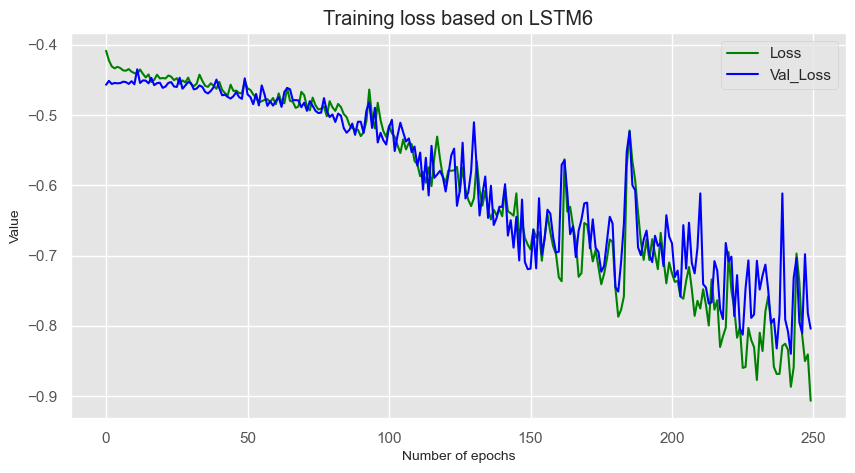

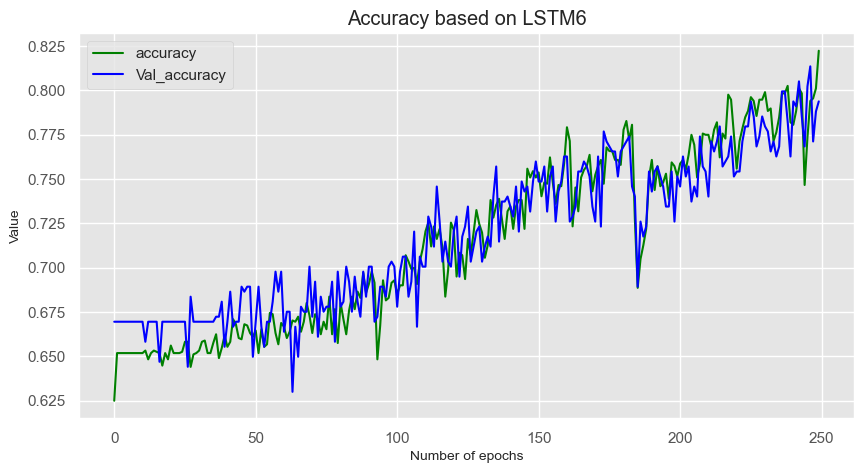

In [728]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(np.log(history.history['loss']), color = 'green', label='Loss')
plt.plot(np.log(history.history['val_loss']), color = 'blue', label='Val_Loss')
plt.legend()
plt.title('Training loss based on LSTM6')
plt.ylabel('Value')
plt.xlabel('Number of epochs')
plt.show()
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], color = 'green', label='accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label='Val_accuracy')
plt.legend()
plt.title('Accuracy based on LSTM6')
plt.ylabel('Value')
plt.xlabel('Number of epochs')
plt.show()

In [729]:
def target_function(learning_rate):
  import tensorflow.keras
  import tensorflow.keras.layers as layers
  import tensorflow as tf
  model = tensorflow.keras.models.Sequential()
  model.add(layers.LSTM(128, return_sequences=True, input_shape=cnn_x[0].shape))
  model.add(layers.Dropout(0.2))
  model.add(layers.LSTM(64))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8))
  model.add(layers.Dense(units=2, activation='softmax'))
  adam = tensorflow.keras.optimizers.Adam(learning_rate=learning_rate) # learning_rate
  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
  model.compile(optimizer=adam, loss="binary_crossentropy", metrics=['accuracy'])
  history = model.fit(cnn_x_train, cnn_y_train,
                    batch_size=16,
                    epochs=50,
                    verbose='auto',
                    validation_split = 0.2,callbacks=[callback])
  n_loss, n_accuracy = model.evaluate(cnn_x_test, cnn_y_test)
  return n_loss

In [730]:
def min_loss(variables_values=[0]):
  return target_function(variables_values[0])

In [731]:
#pre = model.predict_classes(cnn_x_test)
pre = np.argmax(model.predict(cnn_x_test), axis=-1)
pre = pd.Series(pre)
#pre.hist()

14/14 [==============================] - 3s 80ms/step


TP: 83.00, FN: 68.00, FP: 41.00, TN: 250.00
For training data:Loss: 0.41, Accuracy: 0.81
For testing data：Loss: 0.53, Accuracy: 0.75

Total number of testing data is：442.00 
The number of Fall is: 291.00,The correct rate of predicting Fall is: 0.66
Low & High：
Accuracy: 0.75, Precision: 0.67, Recall: 0.55
F1 score: 0.60


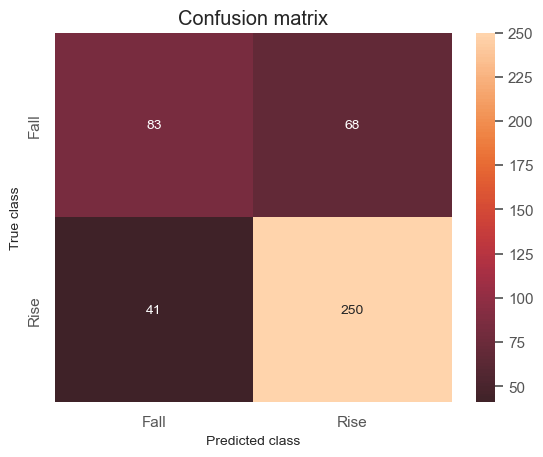

In [732]:
from sklearn.metrics import confusion_matrix

cnn_y_test = np.argmax(cnn_y_test, axis=1)
xcnn_y_test = pd.Series(cnn_y_test)

LABELS = ["Fall","Rise"]
conf_matrix = confusion_matrix(xcnn_y_test, pre)

t_size = len(cnn_y_test)
t_size1 = (cnn_y_test>=1).sum()
t_guess = ((cnn_y_test>=1).sum())/(len(cnn_y_test))

TP = conf_matrix[0][0]
FN = conf_matrix[0][1]
FP = conf_matrix[1][0]
TN = conf_matrix[1][1]
accuracy = (TP+TN)/(TP+FN+FP+TN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2*((precision*recall)/(precision+recall))
print("TP: %.2f, FN: %.2f, FP: %.2f, TN: %.2f" % (TP,FN,FP,TN))
print("For training data:Loss: %.2f, Accuracy: %.2f" % (o_loss, o_accuracy))
print("For testing data：Loss: %.2f, Accuracy: %.2f" % (n_loss, n_accuracy))
print("\nTotal number of testing data is：%.2f \nThe number of Fall is: %.2f,The correct rate of predicting Fall is: %.2f" % (t_size, t_size1, t_guess))
print("Low & High：\nAccuracy: %.2f, Precision: %.2f, Recall: %.2f\nF1 score: %.2f" % (accuracy, precision,recall,F1))

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",center=0.7);
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [733]:
dataset = pd.DataFrame({
    'Close':df['close'],
    'Close_CL':df['close_cl'],
    'Close_OVX':df['close_ovx'],
    'Close_GC':df['close_gc'],
    'Close_GVZ':df['close_gvz'],
    'Close_DX':df['close_dx'],
    'Close_DXY':df['close_dxy'],
    'return': df['close'],
})

feature_names = list(dataset.columns[:-1])

In [734]:
print("before dropping NaN", dataset.shape)
dataset = dataset.dropna()
print("after dropping NaN", dataset.shape)

before dropping NaN (2271, 8)
after dropping NaN (2271, 8)


In [735]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()

dataset_scaled = ss.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns, index=dataset.index)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

Close     Close_CL    Close_OVX     Close_GC    Close_GVZ  \
count  2271.000000  2271.000000  2271.000000  2271.000000  2271.000000   
mean      0.381336     0.656406     0.103259     0.406768     0.194238   
std       0.261375     0.143461     0.084819     0.253382     0.109964   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.191502     0.539732     0.057422     0.200160     0.114339   
50%       0.328617     0.620405     0.087944     0.281803     0.182544   
75%       0.525179     0.801339     0.130364     0.660038     0.258229   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Close_DX    Close_DXY       return  
count  2271.000000  2271.000000  2271.000000  
mean      0.395425     0.518105  2619.321317  
std       0.214987     0.292800   919.845582  
min       0.000000     0.000000  1277.300000  
25%       0.195037     0.170264  1951.245000  
50%       0.450360     0.634692  2433.790000  
75%       0.531625     0.754596  3125.540000  
max       1.000000     1.000000  4796.560000

In [736]:
from keras.utils import np_utils
time_period = 30

cnn_x = []
cnn_y = []
indexs = []
dataset_scaled_x= dataset_scaled[feature_names]

for i in tqdm.tqdm_notebook(range(0, len(dataset_scaled)-time_period-1-31)):
    cnn_x.append(dataset_scaled_x.iloc[i:i+time_period].values)
    r = dataset_scaled['return'].iloc[i+time_period-1+10]/dataset_scaled['return'].iloc[i+time_period-1]
    if r > 1:
        r = 1
    else:
        r = 0
    rr = np_utils.to_categorical(r, num_classes=2)
    cnn_y.append(rr)
    indexs.append(dataset_scaled.index[i+time_period-1])
    
cnn_x = np.array(cnn_x)
cnn_y = np.array(cnn_y)
indexes = np.array(indexs)

C:\Users\Pankaj Suryavanssi\AppData\Local\Temp\ipykernel_12540\1412677145.py:9: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/2209 [00:00<?, ?it/s]

In [737]:
import tensorflow.keras
import tensorflow.keras.layers as layers

model = tensorflow.keras.models.Sequential()
model.add(layers.LSTM(128, return_sequences=True, input_shape=cnn_x[0].shape))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64))
#model.add(layers.LSTM(128))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8))
model.add(layers.Dense(units=2, activation='softmax'))
#model.add(layers.Dense(units=3, activation='softmax'))
adam = tensorflow.keras.optimizers.Adam(learning_rate=0.0005) # learning_rate

model.compile(optimizer=adam, loss="binary_crossentropy", metrics=['accuracy'])

#model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=['accuracy'])
#model.compile(optimizer=adam, loss="mse", metrics=['accuracy'])

model.summary()

Model: "sequential_236"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 30, 128)           69632     
                                                                 
 dropout_34 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_35 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_35 (Dropout)        (None, 64)                0         
                                                                 
 dense_472 (Dense)           (None, 8)                 520       
                                                                 
 dense_473 (Dense)           (None, 2)                 18        
                                                                 
Total params: 119,578
Trainable params: 119,578
Non-

In [738]:
from sklearn.model_selection import train_test_split

cnn_x_train, cnn_x_test, cnn_y_train, cnn_y_test = train_test_split(cnn_x, cnn_y, test_size=0.2)

In [739]:
#import pickle
#file_pi = open('train_test.pickle', 'wb')
#pickle.dump([cnn_x_train, cnn_x_test, cnn_y_train, cnn_y_test], file_pi)

In [740]:
history = model.fit(cnn_x_train, cnn_y_train,
                    batch_size=100,
                    epochs=250,
                    verbose=1,
                    validation_split = 0.2,)
                    #validation_data=(cnn_x_test,cnn_y_test),)

Epoch 1/250
15/15 [==============================] - 20s 749ms/step - loss: 0.6608 - accuracy: 0.6377 - val_loss: 0.6134 - val_accuracy: 0.7090
Epoch 2/250
15/15 [==============================] - 9s 610ms/step - loss: 0.6544 - accuracy: 0.6440 - val_loss: 0.6208 - val_accuracy: 0.7090
Epoch 3/250
15/15 [==============================] - 9s 597ms/step - loss: 0.6501 - accuracy: 0.6440 - val_loss: 0.6110 - val_accuracy: 0.7090
Epoch 4/250
15/15 [==============================] - 9s 583ms/step - loss: 0.6494 - accuracy: 0.6440 - val_loss: 0.6152 - val_accuracy: 0.7090
Epoch 5/250
15/15 [==============================] - 8s 561ms/step - loss: 0.6488 - accuracy: 0.6440 - val_loss: 0.6157 - val_accuracy: 0.7090
Epoch 6/250
15/15 [==============================] - 9s 607ms/step - loss: 0.6547 - accuracy: 0.6433 - val_loss: 0.6179 - val_accuracy: 0.7090
Epoch 7/250
15/15 [==============================] - 9s 584ms/step - loss: 0.6495 - accuracy: 0.6440 - val_loss: 0.6129 - val_accuracy: 0.709

In [741]:
o_loss,o_accuracy = model.evaluate(cnn_x_train,cnn_y_train)
print("對訓練資料的：\nLoss: %.2f, Accuracy: %.2f" % (o_loss, o_accuracy))
n_loss,n_accuracy = model.evaluate(cnn_x_test,cnn_y_test)
print("對測試資料的：\nLoss: %.2f, Accuracy: %.2f" % (n_loss, n_accuracy))

56/56 [==============================] - 2s 26ms/step - loss: 0.2932 - accuracy: 0.8778
對訓練資料的：
Loss: 0.29, Accuracy: 0.88
14/14 [==============================] - 0s 27ms/step - loss: 0.4526 - accuracy: 0.8032
對測試資料的：
Loss: 0.45, Accuracy: 0.80


In [742]:
def target_function(learning_rate):
  import tensorflow.keras
  import tensorflow.keras.layers as layers
  import tensorflow as tf
  model = tensorflow.keras.models.Sequential()
  model.add(layers.LSTM(128, return_sequences=True, input_shape=cnn_x[0].shape))
  model.add(layers.Dropout(0.2))
  model.add(layers.LSTM(64))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8))
  model.add(layers.Dense(units=2, activation='softmax'))
  adam = tensorflow.keras.optimizers.Adam(learning_rate=learning_rate) # learning_rate
  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
  model.compile(optimizer=adam, loss="binary_crossentropy", metrics=['accuracy'])
  history = model.fit(cnn_x_train, cnn_y_train,
                    batch_size=16,
                    epochs=50,
                    verbose='auto',
                    validation_split = 0.2,callbacks=[callback])
  n_loss, n_accuracy = model.evaluate(cnn_x_test, cnn_y_test)
  return n_loss

In [743]:
def min_loss(variables_values=[0]):
  return target_function(variables_values[0])

In [744]:
#pre = model.predict_classes(cnn_x_test)
pre = np.argmax(model.predict(cnn_x_test), axis=-1)
pre = pd.Series(pre)
#pre.hist()

14/14 [==============================] - 2s 27ms/step


TP: 101.00, FN: 53.00, FP: 34.00, TN: 254.00
For training data:Loss: 0.29, Accuracy: 0.88
For testing data：Loss: 0.45, Accuracy: 0.80

Total number of testing data is：442.00 
The number of Fall is: 288.00,The correct rate of predicting Fall is: 0.65
Low & High：
Accuracy: 0.80, Precision: 0.75, Recall: 0.66
F1 score: 0.70


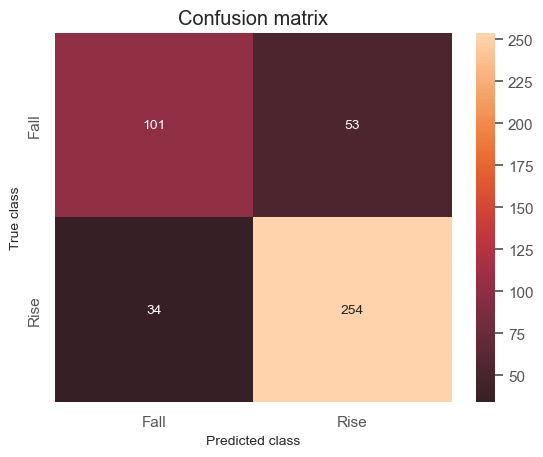

In [745]:
from sklearn.metrics import confusion_matrix

cnn_y_test = np.argmax(cnn_y_test, axis=1)
xcnn_y_test = pd.Series(cnn_y_test)

LABELS = ["Fall","Rise"]
conf_matrix = confusion_matrix(xcnn_y_test, pre)

t_size = len(cnn_y_test)
t_size1 = (cnn_y_test>=1).sum()
t_guess = ((cnn_y_test>=1).sum())/(len(cnn_y_test))

TP = conf_matrix[0][0]
FN = conf_matrix[0][1]
FP = conf_matrix[1][0]
TN = conf_matrix[1][1]
accuracy = (TP+TN)/(TP+FN+FP+TN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2*((precision*recall)/(precision+recall))
print("TP: %.2f, FN: %.2f, FP: %.2f, TN: %.2f" % (TP,FN,FP,TN))
print("For training data:Loss: %.2f, Accuracy: %.2f" % (o_loss, o_accuracy))
print("For testing data：Loss: %.2f, Accuracy: %.2f" % (n_loss, n_accuracy))
print("\nTotal number of testing data is：%.2f \nThe number of Fall is: %.2f,The correct rate of predicting Fall is: %.2f" % (t_size, t_size1, t_guess))
print("Low & High：\nAccuracy: %.2f, Precision: %.2f, Recall: %.2f\nF1 score: %.2f" % (accuracy, precision,recall,F1))

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",center=0.7);
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

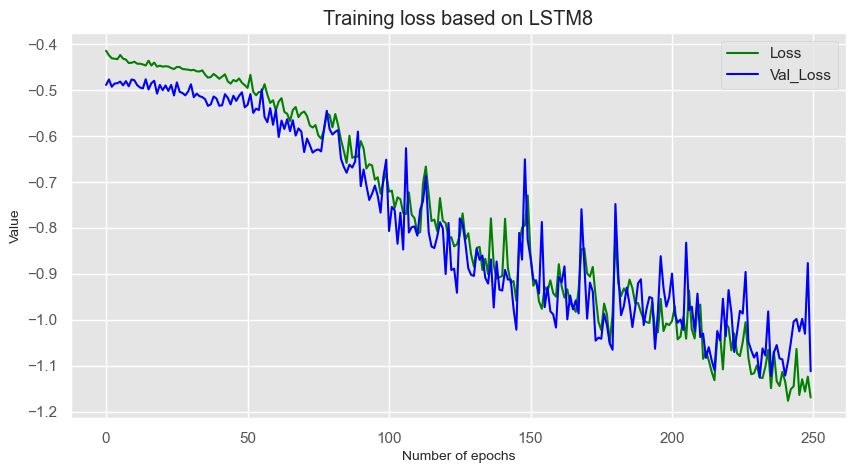

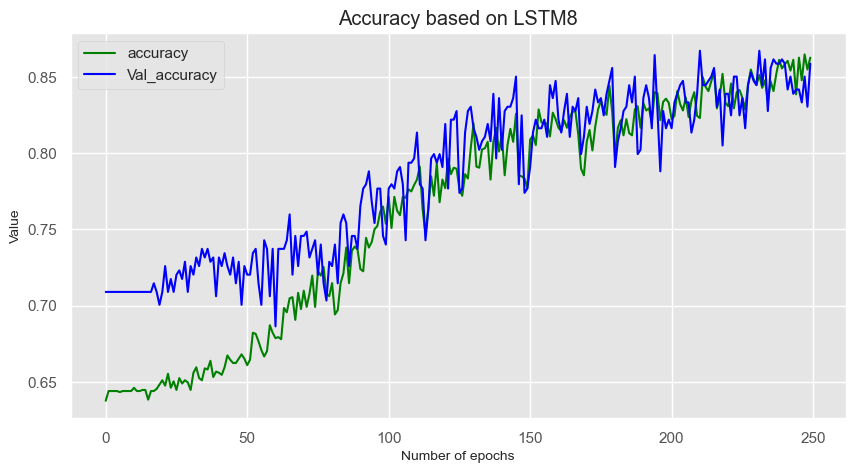

In [746]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(np.log(history.history['loss']), color = 'green', label='Loss')
plt.plot(np.log(history.history['val_loss']), color = 'blue', label='Val_Loss')
plt.legend()
plt.title('Training loss based on LSTM8')
plt.ylabel('Value')
plt.xlabel('Number of epochs')
plt.show()
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], color = 'green', label='accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label='Val_accuracy')
plt.legend()
plt.title('Accuracy based on LSTM8')
plt.ylabel('Value')
plt.xlabel('Number of epochs')
plt.show()

before dropping NaN (2271, 17)
after dropping NaN (2238, 17)


C:\Users\Pankaj Suryavanssi\AppData\Local\Temp\ipykernel_12540\3811876113.py:44: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/2176 [00:00<?, ?it/s]

C:\Users\Pankaj Suryavanssi\AppData\Local\Temp\ipykernel_12540\3811876113.py:46: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Pankaj Suryavanssi\AppData\Local\Temp\ipykernel_12540\3811876113.py:46: RuntimeWarning:

invalid value encountered in double_scalars



Model: "sequential_237"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 30, 128)           74240     
                                                                 
 dropout_36 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_37 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_37 (Dropout)        (None, 64)                0         
                                                                 
 dense_474 (Dense)           (None, 8)                 520       
                                                                 
 dense_475 (Dense)           (None, 2)                 18        
                                                                 
Total params: 124,186
Trainable params: 124,186
Non-

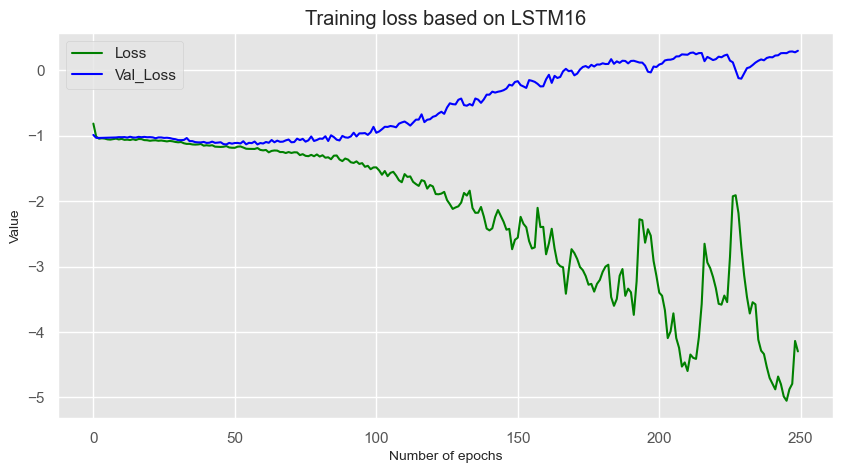

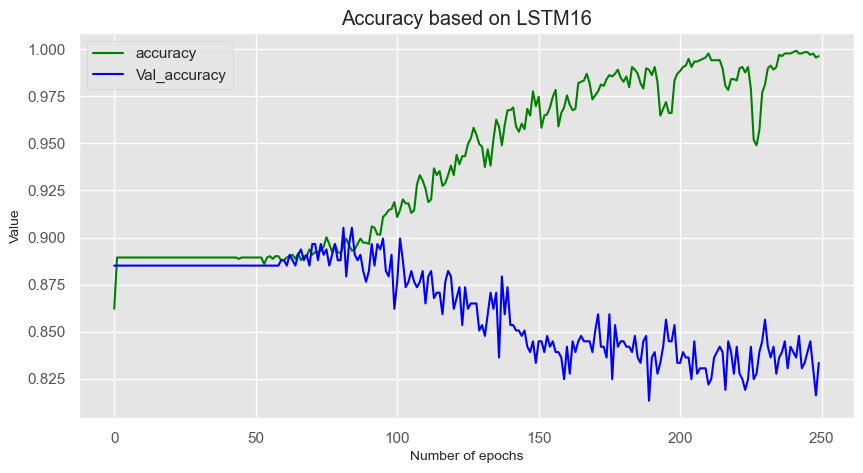

In [747]:
dataset = pd.DataFrame({
    'Close':df['close'],    
    'EMA':ema,
    'SMA':sma,
    'ROC':roc,
    'MACD':macd,
    '%K':k,
    '%D':d,
    'Upper Band':upper,
    'Lower Band':lower,
    '%B':B,
    'Close_CL':df['close_cl'],
    'Close_OVX':df['close_ovx'],
    'Close_GC':df['close_gc'],
    'Close_GVZ':df['close_gvz'],
    'Close_DX':df['close_dx'],
   'Close_DXY':df['close_dxy'],
    'return': df['return'],
})

feature_names = list(dataset.columns[:-1])

print("before dropping NaN", dataset.shape)
dataset = dataset.dropna()
print("after dropping NaN", dataset.shape)

from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()

dataset_scaled = ss.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns, index=dataset.index)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

from keras.utils import np_utils
time_period = 30

cnn_x = []
cnn_y = []
indexs = []
dataset_scaled_x= dataset_scaled[feature_names]

for i in tqdm.tqdm_notebook(range(0, len(dataset_scaled)-time_period-1-31)):
    cnn_x.append(dataset_scaled_x.iloc[i:i+time_period].values)
    r = dataset_scaled['return'].iloc[i+time_period-1+10]/dataset_scaled['return'].iloc[i+time_period-1]
    if r > 1:
        r = 1
    else:
        r = 0
    rr = np_utils.to_categorical(r, num_classes=2)
    cnn_y.append(rr)
    indexs.append(dataset_scaled.index[i+time_period-1])
    
cnn_x = np.array(cnn_x)
cnn_y = np.array(cnn_y)
indexes = np.array(indexs)

import tensorflow.keras
import tensorflow.keras.layers as layers

model = tensorflow.keras.models.Sequential()
model.add(layers.LSTM(128, return_sequences=True, input_shape=cnn_x[0].shape))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8))
model.add(layers.Dense(units=2, activation='softmax'))

adam = tensorflow.keras.optimizers.Adam(learning_rate=0.0005) # learning_rate

model.compile(optimizer=adam, loss="binary_crossentropy", metrics=['accuracy'])
#model.compile(optimizer=adam, loss="mse", metrics=['accuracy'])

model.summary()

from sklearn.model_selection import train_test_split

cnn_x_train, cnn_x_test, cnn_y_train, cnn_y_test = train_test_split(cnn_x, cnn_y, test_size=0.2)

#import pickle
#file_pi = open('train_test.pickle', 'wb')
#pickle.dump([cnn_x_train, cnn_x_test, cnn_y_train, cnn_y_test], file_pi)

history = model.fit(cnn_x_train, cnn_y_train,
                    batch_size=100,
                    epochs=250,
                    verbose=1,
                    validation_split = 0.2,)
                    #validation_data=(cnn_x_test,cnn_y_test),)

o_loss,o_accuracy = model.evaluate(cnn_x_train,cnn_y_train)
print("對訓練資料的：\nLoss: %.2f, Accuracy: %.2f" % (o_loss, o_accuracy))
n_loss,n_accuracy = model.evaluate(cnn_x_test,cnn_y_test)
print("對測試資料的：\nLoss: %.2f, Accuracy: %.2f" % (n_loss, n_accuracy))

def target_function(learning_rate):
  import tensorflow.keras
  import tensorflow.keras.layers as layers
  import tensorflow as tf
  model = tensorflow.keras.models.Sequential()
  model.add(layers.LSTM(128, return_sequences=True, input_shape=cnn_x[0].shape))
  model.add(layers.Dropout(0.2))
  model.add(layers.LSTM(64))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8))
  model.add(layers.Dense(units=2, activation='softmax'))
  adam = tensorflow.keras.optimizers.Adam(learning_rate=learning_rate) # learning_rate
  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
  model.compile(optimizer=adam, loss="binary_crossentropy", metrics=['accuracy'])
  history = model.fit(cnn_x_train, cnn_y_train,
                    batch_size=16,
                    epochs=50,
                    verbose='auto',
                    validation_split = 0.2,callbacks=[callback])
  n_loss, n_accuracy = model.evaluate(cnn_x_test, cnn_y_test)
  return n_loss

def min_loss(variables_values=[0]):
  return target_function(variables_values[0])

plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(np.log(history.history['loss']), color = 'green', label='Loss')
plt.plot(np.log(history.history['val_loss']), color = 'blue', label='Val_Loss')
plt.legend()
plt.title('Training loss based on LSTM16')
plt.ylabel('Value')
plt.xlabel('Number of epochs')
plt.show()
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], color = 'green', label='accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label='Val_accuracy')
plt.legend()
plt.title('Accuracy based on LSTM16')
plt.ylabel('Value')
plt.xlabel('Number of epochs')
plt.show()

In [748]:
def target_function(learning_rate):
  import tensorflow.keras
  import tensorflow.keras.layers as layers
  import tensorflow as tf
  model = tensorflow.keras.models.Sequential()
  model.add(layers.LSTM(128, return_sequences=True, input_shape=cnn_x[0].shape))
  model.add(layers.Dropout(0.2))
  model.add(layers.LSTM(64))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8))
  model.add(layers.Dense(units=2, activation='softmax'))
  adam = tensorflow.keras.optimizers.Adam(learning_rate=learning_rate) # learning_rate
  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
  model.compile(optimizer=adam, loss="binary_crossentropy", metrics=['accuracy'])
  history = model.fit(cnn_x_train, cnn_y_train,
                    batch_size=16,
                    epochs=50,
                    verbose='auto',
                    validation_split = 0.2,callbacks=[callback])
  n_loss, n_accuracy = model.evaluate(cnn_x_test, cnn_y_test)
  return n_loss

In [749]:
def min_loss(variables_values=[0]):
  return target_function(variables_values[0])

In [750]:
#pre = model.predict_classes(cnn_x_test)
pre = np.argmax(model.predict(cnn_x_test), axis=-1)
pre = pd.Series(pre)
#pre.hist()

14/14 [==============================] - 3s 29ms/step


TP: 346.00, FN: 38.00, FP: 41.00, TN: 11.00
For training data:Loss: 0.27, Accuracy: 0.97
For testing data：Loss: 1.32, Accuracy: 0.82

Total number of testing data is：436.00 
The number of Fall is: 52.00,The correct rate of predicting Fall is: 0.12
Low & High：
Accuracy: 0.82, Precision: 0.89, Recall: 0.90
F1 score: 0.90


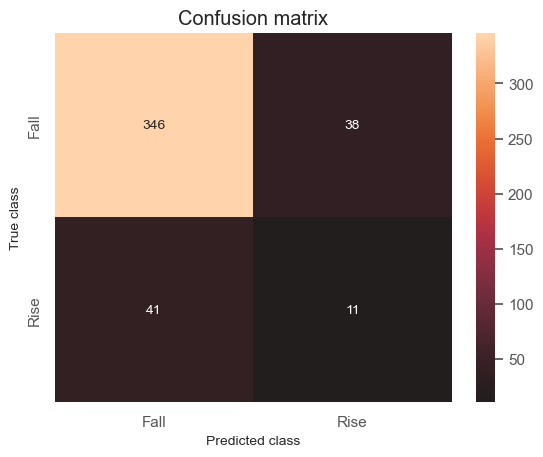

In [751]:
from sklearn.metrics import confusion_matrix

cnn_y_test = np.argmax(cnn_y_test, axis=1)
xcnn_y_test = pd.Series(cnn_y_test)

LABELS = ["Fall","Rise"]
conf_matrix = confusion_matrix(xcnn_y_test, pre)

t_size = len(cnn_y_test)
t_size1 = (cnn_y_test>=1).sum()
t_guess = ((cnn_y_test>=1).sum())/(len(cnn_y_test))

TP = conf_matrix[0][0]
FN = conf_matrix[0][1]
FP = conf_matrix[1][0]
TN = conf_matrix[1][1]
accuracy = (TP+TN)/(TP+FN+FP+TN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2*((precision*recall)/(precision+recall))
print("TP: %.2f, FN: %.2f, FP: %.2f, TN: %.2f" % (TP,FN,FP,TN))
print("For training data:Loss: %.2f, Accuracy: %.2f" % (o_loss, o_accuracy))
print("For testing data：Loss: %.2f, Accuracy: %.2f" % (n_loss, n_accuracy))
print("\nTotal number of testing data is：%.2f \nThe number of Fall is: %.2f,The correct rate of predicting Fall is: %.2f" % (t_size, t_size1, t_guess))
print("Low & High：\nAccuracy: %.2f, Precision: %.2f, Recall: %.2f\nF1 score: %.2f" % (accuracy, precision,recall,F1))

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",center=0.7);
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()